# Latar Belakang

Untuk menaikkan popularitas dan membuat capres pilihannya menjadi lebih dikenal orang, suatu tim juru kampanye seorang capres ingin membuat video yang dapat trending di youtube US dalam upaya menaikkan engagement dan popularitas capres tersebut. Saya sebagai data analyst diminta untuk mencari tahu bagaimana suatu video dapat menjadi trending di situs web Youtube, spesifiknya di negara US.

## Pernyataan Masalah

Bagaimana caranya tim kampanye tersebut dapat menggugah video yang dapat menjadi trending di halaman Youtube di US dan berhasil menaikkan engagement dan popularitas capres tim tersebut. Saya diminta untuk memberikan rumus atau formula untuk membuat suatu video yang dapat dipastikan masuk ke halaman trending di Youtube dan ditonton banyak orang.

Untuk membuat video trending di youtube, hal-hal apa saja yang dibutuhkan? Apakah ada rumus atau formula untuk membuat suatu video yang dapat dipastikan masuk ke halaman trending di Youtube dan ditonton banyak orang? Ada beberapa faktor yang dapat menentukan suatu video dapat masuk ke halaman trending di youtube negara US, saya akan coba jabarkan satu per satu. 

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa dataset video trending youtube dari 14 November 2017 - 14 Juni 2018 di negara US. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1JFhDSfs4vzWuCdsBFObEp5sVLQMo-dR1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
import statsmodels
import scipy

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait video-video yang berhasil masuk halaman trending Youtube di US. Ada 16 kolom di dalam dataset USvideos, yaitu:  

* video_id : id unik tiap video
* trending_date : tanggal video masuk ke halaman trending Youtube
* title : nama judul video tersebut
* channel_title : nama saluran yang menggugah video tersebut
* category_id : nomor id kategori video tersebut 
* publish_time : jam dan tanggal video diunggah ke Youtube
* tags : tag-tag yang ada di video tersebut
* views : jumlah orang yang menonton video tersebut
* likes : jumlah orang yang menyukai video tersebut
* dislikes : jumlah orang yang tidak menyukai video tersebut
* comment_count : jumlah komentar yang ada di video tersebut
* thumbnail_link : tautan thumbnail video tersebut
* comments_disabled : apakah kolom komentar dinon-aktifkan (True/False)
* ratings_disabled : apakah rating dinon-aktifkan (True/False)
* video_error_or_removed : apakah video error atau dihapus (True/False)
* description : deskripsi video tersebut


Berikut 5 baris teratas dan terbawah dari dataset USvideos.

In [3]:
yt=pd.read_csv('USvideos.csv')
display(yt.head(),yt.tail())

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

video_id trending_date  \
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg              False   
40946  https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg              False   
40947  https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg              False   
40948  https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
40944             False                   False   
40945             False                   False   
40946             False                   False   
40947             False                   False   
40948             False                   False   

                                             description  
40944     The Cat Who Caught the Laser - Aaron's Animals  
40945                                                NaN  
40946  I had so much fun transforming Safiyas hair in...  
40947  How Black Panther Should Have EndedWatch More ...  
40948  Call of Duty: Black Ops 4 Multiplayer raises t...

## Data Understanding and Cleaning

Pertama-tama kita harus mengenal dataset kita terlebih dahulu dalam tahapan *data understanding*. Dalam proses ini, kita dapat mengetahui detail dan anomali-anomali yang ada di dalam dataset kita dan apakah perlu kita tangani dalam tahapan *data cleaning*. Setiap langkah yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset USvideos.



In [4]:
print(f'Jumlah baris dan kolom di dataset yt adalah {yt.shape}')
yt.info()

Jumlah baris dan kolom di dataset yt adalah (40949, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14

In [5]:
display(yt.describe().round(1), yt.describe(include='object'))

category_id        views      likes   dislikes  comment_count
count      40949.0      40949.0    40949.0    40949.0        40949.0
mean          20.0    2360784.6    74266.7     3711.4         8446.8
std            7.6    7394113.8   228885.3    29029.7        37430.5
min            1.0        549.0        0.0        0.0            0.0
25%           17.0     242329.0     5424.0      202.0          614.0
50%           24.0     681861.0    18091.0      631.0         1856.0
75%           25.0    1823157.0    55417.0     1938.0         5755.0
max           43.0  225211923.0  5613827.0  1674420.0      1361580.0

video_id trending_date                                       title  \
count         40949         40949                                       40949   
unique         6351           205                                        6455   
top     j4KvrAUjn6c      17.14.11  WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
freq             30           200                                          30   

       channel_title              publish_time    tags  \
count          40949                     40949   40949   
unique          2207                      6269    6055   
top             ESPN  2018-05-18T14:00:04.000Z  [none]   
freq             203                        50    1535   

                                        thumbnail_link  \
count                                            40949   
unique                                            6352   
top     https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg   
freq                                                30   

                                              description  
count                                               40379  
unique                                               6901  
top     ► Listen LIVE: http://power1051fm.com/\n► Face...  
freq                                                   58

In [6]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in yt.columns :
    listItem.append( [col, yt[col].nunique(), yt[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   video_id                6351               
1   trending_date           205                
2   title                   6455               
3   channel_title           2207               
4   category_id             16                 
5   publish_time            6269               
6   tags                    6055               
7   views                   40478              
8   likes                   29850              
9   dislikes                8516               
10  comment_count           13773              
11  thumbnail_link          6352               
12  comments_disabled       2                  
13  ratings_disabled        2                  
14  video_error_or_removed  2                  
15  description             6901               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Secara umum, kita bisa melihat bahwa:
* dataset USvideos memiliki 16 kolom dan 40.949 baris
* hanya satu kolom, yaitu, `description` yang memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan data NaN. Kita akan drop kolom `description` yang memiliki data NaN ini karena kita tidak membutuhkannya pada analisis.
* kolom `videos_id` berisikan id unik untuk tiap video, `thumbnail_link` berisikan tautan thumbnail video tersebut, `trending_date` berisikan tanggal video masuk ke halam trending youtube & `video_error_or_removed` berisikan apakah video tersebut error atau sudah dihapus, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `category_id` berisikan nomor id kategori video, masih berupa numerik. Untuk mendapatkan kategori berdasarkan namanya kita harus mengekstrak nama category dari file 'US_category_id.json'.
* kolom `publish_time` dapat kita langsung rapihkan karena format sudah sesuai, lalu buat 3 kolom baru dari `publish_time` yaitu `publish_day`, `publish_month`, & `publish_time` untuk mempermudah analisa data.

Berdasarkan data type, dataset USvideos terdiri dari 5 kolom dengan data type integer, 8 kolom dengan data type string, dan 3 kolom dengan data type boolean. 

### Missing Value

Hanya 1 kolom yang terdapat missing value di dalamnya, yaitu kolom `Description` 

In [7]:
# persentase missing value di kolom description

yt['description'].isna().sum()/yt.shape[0]*100

1.3919753840142617

*missing value* di kolom `Description` hanya berjumlah 570 dari 40.949 baris, atau sekitar 1.39%, yang mana bisa dilihat tidak terlalu signifikan. Akan tetapi kita tidak akan membutuhkan kolom `description`, maka dari itu kita dapat memilih untuk menghapus kolom `description` yang berisi missing value ini untuk merapihkan data kita.

In [8]:
# drop kolom 'description' yang berisi data kosong 
yt.drop(columns='description',inplace=True)

### Data Duplikat

In [9]:
# mengecek jumlah data yang duplikat
yt.duplicated().value_counts()

False    40901
True     48   
dtype: int64

Terdapat 48 data yang duplikat, karena total data duplikat sangat kecil kita akan menghapus data-data duplikat tersebut

In [10]:
# menghapus data duplikat
yt=yt.drop_duplicates()

In [11]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
dtypes:

Setelah melakukan proses cleaning, total data kita menjadi 40332 baris. Selanjutnya kita akan drop beberapa kolom yang tidak kita butuhkan dalam proses analisis.

### Drop kolom yang tidak dibutuhkan

In [12]:
# kolom video_id & thumbnail_link
display(yt['video_id'],yt['thumbnail_link'],yt['trending_date'],yt['video_error_or_removed'])

0        2kyS6SvSYSE
1        1ZAPwfrtAFY
2        5qpjK5DgCt4
3        puqaWrEC7tY
4        d380meD0W0M
            ...     
40944    BZt0qjTWNhw
40945    1h7KV2sjUWY
40946    D6Oy4LfoqsU
40947    oV0zkMe1K8s
40948    ooyjaVdt-jA
Name: video_id, Length: 40901, dtype: object

0        https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg
1        https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg
2        https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg
3        https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg
4        https://i.ytimg.com/vi/d380meD0W0M/default.jpg
                              ...                      
40944    https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg
40945    https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg
40946    https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg
40947    https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg
40948    https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg
Name: thumbnail_link, Length: 40901, dtype: object

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 40901, dtype: object

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947    False
40948    False
Name: video_error_or_removed, Length: 40901, dtype: bool

Dapat dilihat kolom `video_id`, `thumbnail_link`, `trending_date` & `video_error_or_removed` tidak terlalu dapat digunakan dalam proses analisis, oleh karena itu kita akan drop keempat kolom tersebut.

In [13]:
yt.drop(columns='video_id',inplace=True)
yt.drop(columns='thumbnail_link',inplace=True)
yt.drop(columns='trending_date',inplace=True)
yt.drop(columns='video_error_or_removed',inplace=True)

### Membuat kolom baru

#### `category`

Kita akan membuat kolom baru yang berisi nama kategori yang dapat diambil dari file 'US_category_id.json' berdasarkan nomor id dari `category_id` , lalu kita dapat drop kolom `category_id` tersebut.

Langkah pertama adalah memahami data file json tersebut.

In [14]:
cat = json.load(open('US_category_id.json'))
cat

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

Dapat dilihat bahwa file json di atas berbentuk dictionary, untuk mendapatkan nama kategori kita hanya membutuhkan 2 items yaitu `id` & `title`. Kita akan mengambil semua data dari key `items` lalu menambahkan 2 items yang kita inginkan yaitu `id` & `title` ke dalam dictionary kosong yang akan kita buat.

In [15]:
# mengambil semua data dari key 'items'"
cat = cat['items']

# membuat dictionary kosong
category = {}

# menambahkan 2 items yang kita butuhkan 'id' & 'title'
for i in cat:
    category[int(i["id"])] = i["snippet"]["title"]

category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Dari data dictionary di atas kita akan membuat kolom baru bernama `category` dan drop kolom `category_id`.

In [16]:
yt['category'] = yt['category_id'].map(category)
yt.drop(columns='category_id', inplace=True)

In [17]:
# kolom 'category' sudah ditambahkan ke dalam dataset
yt['category']

0        People & Blogs  
1        Entertainment   
2        Comedy          
3        Entertainment   
4        Entertainment   
             ...         
40944    Pets & Animals  
40945    People & Blogs  
40946    Entertainment   
40947    Film & Animation
40948    Gaming          
Name: category, Length: 40901, dtype: object

#### `publish_time`

Kita akan langsung merapihkan `publish_time` menjadi 'tahun-bulan-hari' karena formatnya sudah sesuai, lalu mengubah type data tersebut menjadi datetime.

In [18]:
# format data awal 
yt['publish_time']

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40944    2018-05-18T13:00:04.000Z
40945    2018-05-18T01:00:06.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40901, dtype: object

Karena format tanggal dari data pada kolom `publish_time` sudah sesuai, maka kita akan langsung merapihkan datanya. Dapat dilihat di atas, data pada kolom `publish_time` masih bercampur dan tidak mudah untuk dibaca, oleh karena itu kita akan membagi datanya menjadi "tahun-bulan-hari"  dan "jam:menit:detik" lalu menghapus ".000Z" di belakang karena tidak relevan dengan data yang kita butuhkan. Lalu kita akan mengubah data tipe dari object menjadi datetime.

In [19]:
# memisahkan data di kolom 'publish_time' ke 3 kolom baru
yt[['publish_date', 'publish_time']] = yt['publish_time'].str.split('T',expand=True)  

yt[['publish_time', 'drop']] = yt['publish_time'].str.split('.',expand=True) 


In [20]:
# drop kolom yang tidak dibutuhkan 
yt.drop(columns='drop', inplace=True)

In [21]:
# mengubah data tipe kolom 'publish_date' & 'publish_time' dari object menjadi datetime
yt['publish_date'] = pd.to_datetime(yt['publish_date'], format='%Y.%m.%d')
yt['publish_time'] = pd.to_datetime(yt['publish_time'])

Setelah merapihkan data, kita akan membuat 2 kolom baru dari kolom `publish_date` di atas, yaitu `publish_day` & `publish_month`.

In [22]:
# membuat kolom baru 'publish_day' & 'publish_month' yang berisikan hari & bulan video-video tersebut diunggah ke youtube
yt['publish_day'] = yt['publish_date'].dt.day_name()
yt['publish_month'] = yt['publish_date'].dt.month_name()

Kita sudah mempunyai 3 kolom baru yang dibutuhkan yaitu kolom `publish_day`, `publish_month`, & `publish_time`. Kita bisa menghapus kolom lamanya yaitu `publish_date` karena kita tidak akan membutuhkannya lagi

In [23]:
yt.drop(columns='publish_date',inplace=True)

In [24]:
# 3 kolom baru sudah ditambahkan ke dalam dataset
display(yt['publish_day'],yt['publish_month'],yt['publish_time'])

0        Monday  
1        Monday  
2        Sunday  
3        Monday  
4        Sunday  
          ...    
40944    Friday  
40945    Friday  
40946    Friday  
40947    Thursday
40948    Thursday
Name: publish_day, Length: 40901, dtype: object

0        November
1        November
2        November
3        November
4        November
           ...   
40944    May     
40945    May     
40946    May     
40947    May     
40948    May     
Name: publish_month, Length: 40901, dtype: object

0       2023-02-10 17:13:01
1       2023-02-10 07:30:00
2       2023-02-10 19:05:24
3       2023-02-10 11:00:04
4       2023-02-10 18:01:41
                ...        
40944   2023-02-10 13:00:04
40945   2023-02-10 01:00:06
40946   2023-02-10 17:34:22
40947   2023-02-10 17:00:04
40948   2023-02-10 17:09:38
Name: publish_time, Length: 40901, dtype: datetime64[ns]

Karena ada 4 kolom yang tidak akan kita gunakan maka kita akan mengatur ulang kolom-kolom yang akan digunakan dalam analisis.

In [62]:
yt = yt[['title', 'channel_title','category', 'publish_time', 'publish_day', 'publish_month', 'views', 'likes', 'comment_count', 'comments_disabled', 'ratings_disabled']]
yt.head()

title  \
0  WE WANT TO TALK ABOUT OUR MARRIAGE                               
1  The Trump Presidency: Last Week Tonight with John Oliver (HBO)   
2  Racist Superman | Rudy Mancuso, King Bach & Lele Pons            
3  Nickelback Lyrics: Real or Fake?                                 
4  I Dare You: GOING BALD!?                                         

           channel_title        category        publish_time publish_day  \
0  CaseyNeistat           People & Blogs 2023-02-10 17:13:01  Monday       
1  LastWeekTonight        Entertainment  2023-02-10 07:30:00  Monday       
2  Rudy Mancuso           Comedy         2023-02-10 19:05:24  Sunday       
3  Good Mythical Morning  Entertainment  2023-02-10 11:00:04  Monday       
4  nigahiga               Entertainment  2023-02-10 18:01:41  Sunday       

  publish_month    views   likes  comment_count  comments_disabled  \
0  November      748374   57527   15954          False               
1  November      2418783  97185   12703          False               
2  November      3191434  146033  8181           False               
3  November      343168   10172   2146           False               
4  November      2095731  132235  17518          False               

   ratings_disabled  
0  False             
1  False             
2  False             
3  False             
4  False

## Data yang sudah bersih

dataset USvideos sudah selesai dibersihkan, sekarang mari kita lihat sekilas dataset yang sudah bersih ini.

In [26]:
listItem = []
for col in yt.columns :
    listItem.append([col, yt[col].dtype, yt[col].isna().sum(),
                    yt[col].nunique(), list(yt[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(yt.shape)
dfDesc

(40901, 12)


dataFeatures        dataType  null  unique  \
0   title              object          0     6455     
1   channel_title      object          0     2207     
2   category           object          0     16       
3   publish_time       datetime64[ns]  0     4478     
4   publish_day        object          0     7        
5   publish_month      object          0     12       
6   views              int64           0     40478    
7   likes              int64           0     29850    
8   comment_count      int64           0     13773    
9   comments_disabled  bool            0     2        
10  ratings_disabled   bool            0     2        
11  tags               object          0     6055     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  uniqueSample  
0   [Google Pixelbook: $1000 of Weird!, TB@DET: Enberg on the origins of his 'oh my' call]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1   [TWICE JAPAN OFFICIAL YouTube Channel, I.T. Channel]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
2   [Howto & Style, Nonprofits & Activism]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3   [2023-02-10T15:08:46.

In [27]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              40901 non-null  object        
 1   channel_title      40901 non-null  object        
 2   category           40901 non-null  object        
 3   publish_time       40901 non-null  datetime64[ns]
 4   publish_day        40901 non-null  object        
 5   publish_month      40901 non-null  object        
 6   views              40901 non-null  int64         
 7   likes              40901 non-null  int64         
 8   comment_count      40901 non-null  int64         
 9   comments_disabled  40901 non-null  bool          
 10  ratings_disabled   40901 non-null  bool          
 11  tags               40901 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(3), object(6)
memory usage: 3.5+ MB


Sebelum dibersihkan kita memiliki 40949 baris data, dan 16 kolom. Sekarang kita memiliki 40901 baris data, dan 11 kolom setelah menghapus kolom `description` yang memiliki data *missing value* dan 48 data duplikat.

# Data Analysis
Kita sudah melakukan tahap _data understanding & cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana sebuah video dapat masuk ke halaman trending di youtube**.  

Analisis akan dilakukan dengan cara mencari tahu ciri-ciri video yang berhasil masuk ke halaman trending di youtube. Kita akan melakukan analisis berdasarkan kolom-kolom yang ada pada dataset, dan mencoba mencari kesimpulan dari hasil analisis.

In [28]:
yt.describe().round(1)

views      likes  comment_count
count  40901.0      40901.0    40901.0      
mean   2360678.0    74271.7    8448.6       
std    7397718.7    228999.9   37451.4      
min    549.0        0.0        0.0          
25%    241972.0     5416.0     613.0        
50%    681064.0     18069.0    1855.0       
75%    1821926.0    55338.0    5752.0       
max    225211923.0  5613827.0  1361580.0

Bisa kita lihat dari tabel di atas:

* Rata-rata views(penonton) dari video yang trending adalah 2.370.823  
* 50% dari video yang trending mempunyai views kurang tadi 688.423  
* Rata-rata likes(jumlah penonton yang menyukai video tersebut) dari video yang trending adalah 74.622 sedangkan dislikes(jumlah penonton yang tidak menyukai video tersebut) adalah 3508. Terdapat selisih 71.114   
* Rata-rata jumlah komentar pada video trending adalah 8.289, sedangkan 50% dari video yang trending hanya memiliki komentar dengan jumlah di bawah 1.873  

Pertama kita akan mencoba mencari korelasi antar beberapa kolom

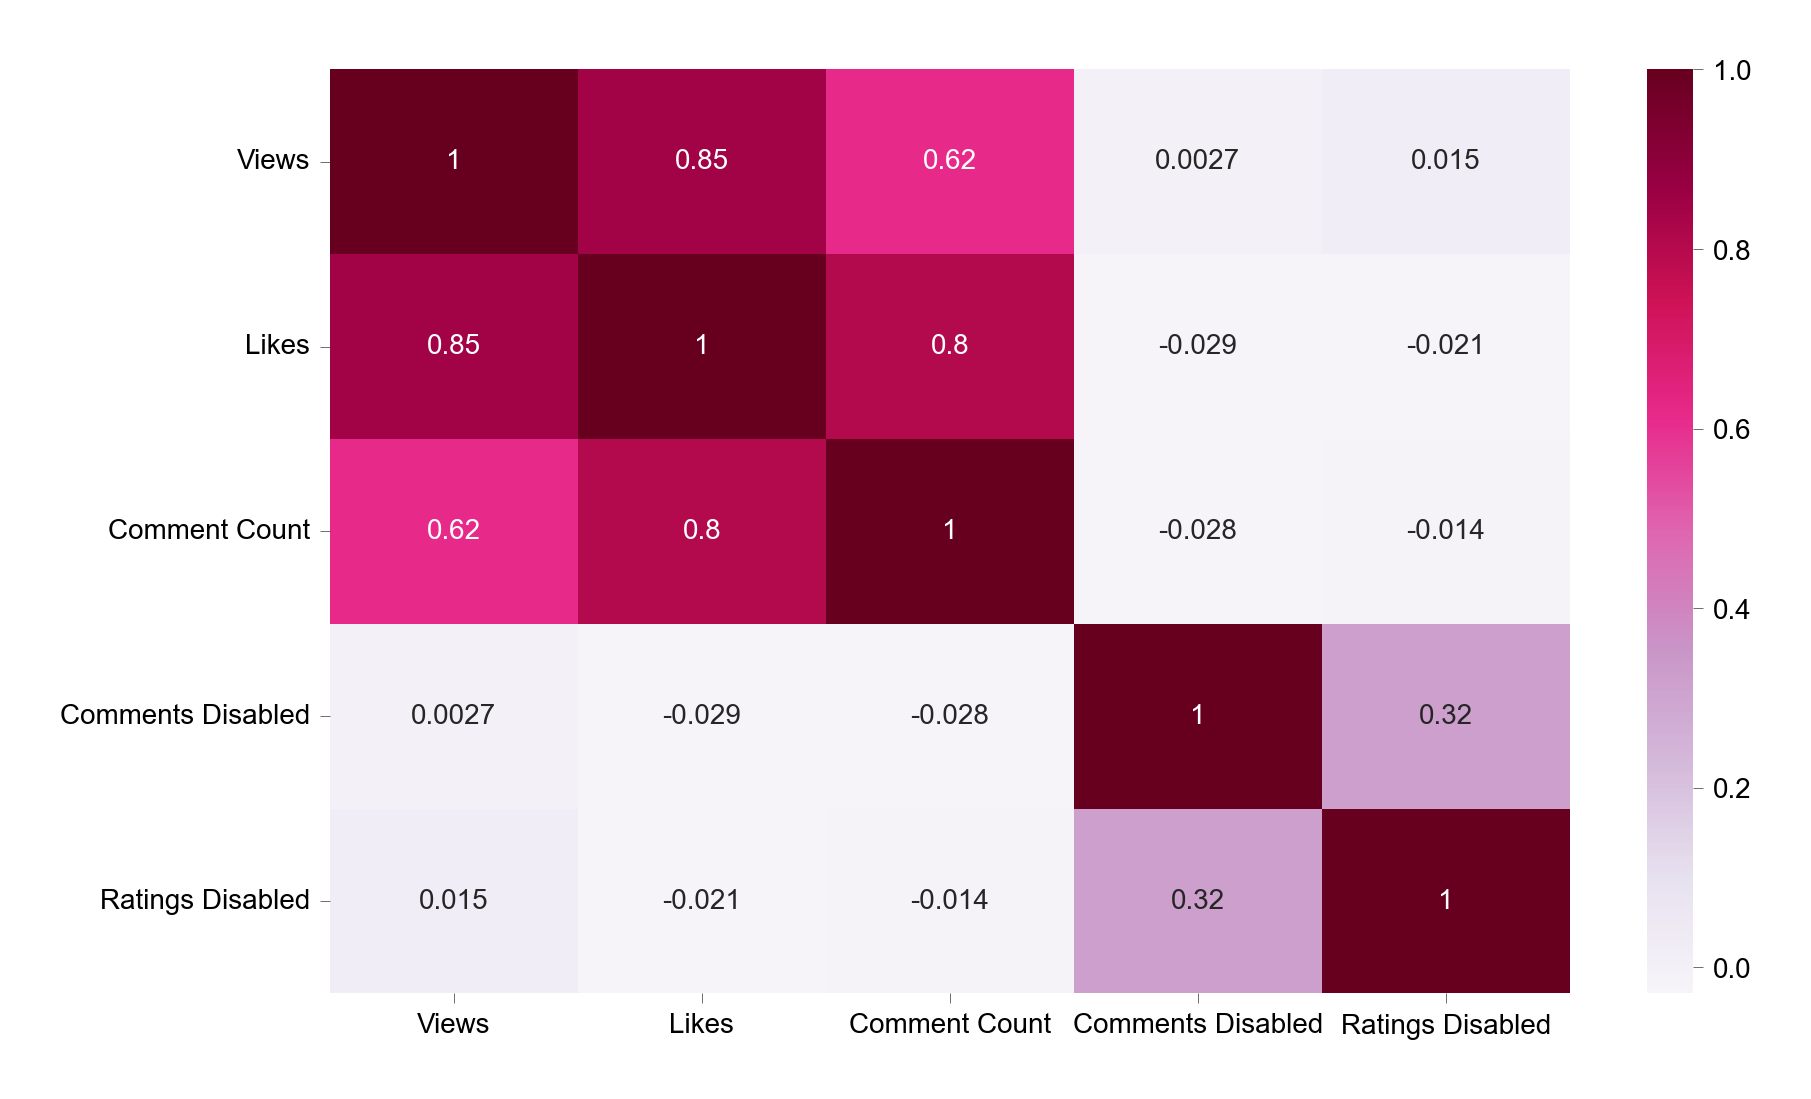

In [29]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(yt.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
heat = sns.heatmap(yt.corr(method ='pearson'), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap='PuRd', ax=ax)

Dari heatmap korelasi dapat dilihat tidak terlalu banyak terdapat korelasi antar kolom yang mempunya numerik atau boolean. hanya ada 3 kolom yang mempunyai nilai korelasi sedang & kuat, nilai korelasi antar ketiga kolom positif, menunjukkan arah hubungan berbanding lurus. 

In [61]:
yt.head()

title  \
0  WE WANT TO TALK ABOUT OUR MARRIAGE                               
1  The Trump Presidency: Last Week Tonight with John Oliver (HBO)   
2  Racist Superman | Rudy Mancuso, King Bach & Lele Pons            
3  Nickelback Lyrics: Real or Fake?                                 
4  I Dare You: GOING BALD!?                                         

           channel_title        category        publish_time publish_day  \
0  CaseyNeistat           People & Blogs 2023-02-10 17:13:01  Monday       
1  LastWeekTonight        Entertainment  2023-02-10 07:30:00  Monday       
2  Rudy Mancuso           Comedy         2023-02-10 19:05:24  Sunday       
3  Good Mythical Morning  Entertainment  2023-02-10 11:00:04  Monday       
4  nigahiga               Entertainment  2023-02-10 18:01:41  Sunday       

  publish_month    views   likes  comment_count  comments_disabled  \
0  November      748374   57527   15954          False               
1  November      2418783  97185   12703          False               
2  November      3191434  146033  8181           False               
3  November      343168   10172   2146           False               
4  November      2095731  132235  17518          False               

   ratings_disabled  \
0  False              
1  False              
2  False              
3  False              
4  False              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            tags  \
0  SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1  last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"                                                                                                                                                                                                                                                                                                                                                                                          
2  racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons"                                                                                                                                                                      
3  rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no truth"|"comments"|"comedy"|"funny"|"stupid"|"fail"                                                                                     

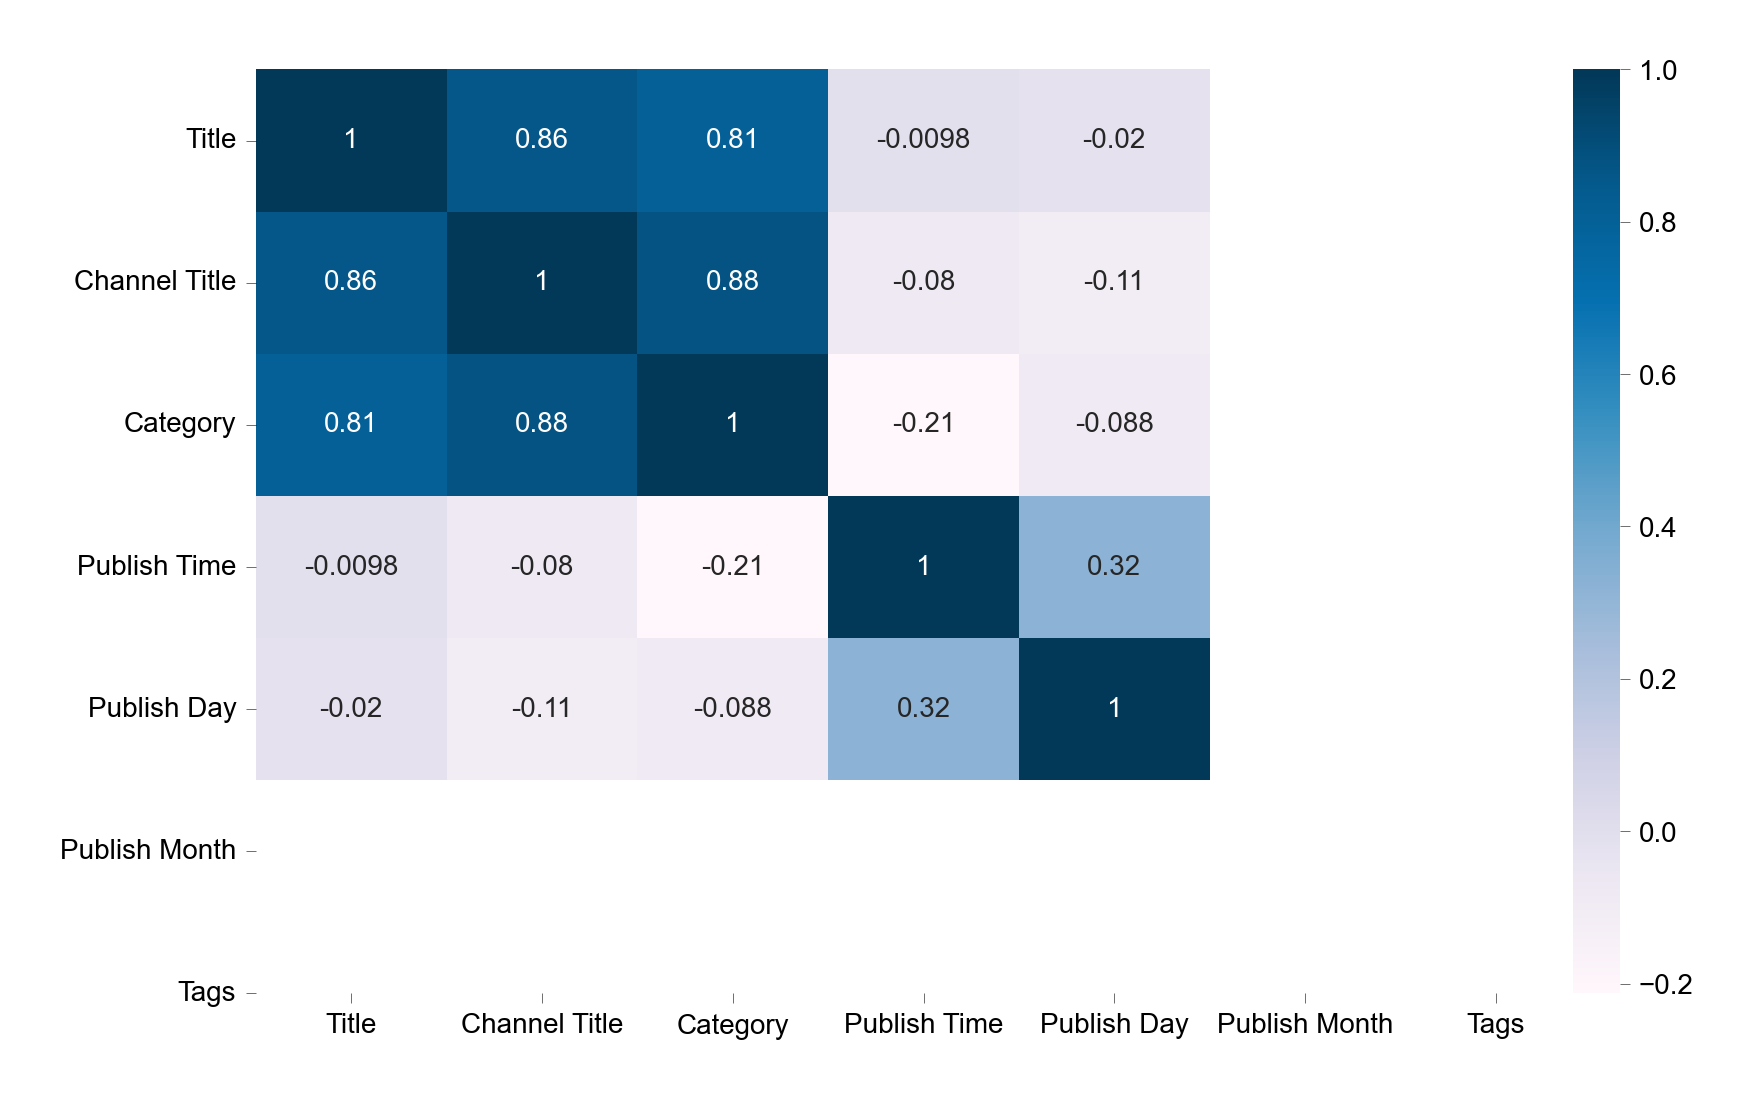

In [30]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(yt.select_dtypes(exclude=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
heat = sns.heatmap(yt.corr(method ='spearman'), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap='PuBu', ax=ax)

Sedangkan dari heatmap korelasi yang berisikan kolom selain kolom yang mengandung data & boolean, sama seperti heatmap sebelumnya, dapat dilihat hanya ada 3 kolom yang mempunyai nilai korelasi yang kuat, dan nilai korelasi antar ketiga kolom positif, menunjukkan arah hubungan berbanding lurus.

## Normalitas Data

Kita akan coba mengecek distribusi data kita pada beberapa kolom, di sini saya akan menggunakan Uji Lilliefors karena saya akan menguji normalitas 1 kolom saja dan jumlah data tidak terlalu banyak hanya 40901.

H0 : distribusi data normal  
Ha : distribusi data tidak normal

### Kolom `likes`

In [31]:
from statsmodels.stats.diagnostic import lilliefors
data = yt['likes']
statistic, p_value = lilliefors(data, pvalmethod='table')
if p_value > 0.05:
    print('Distribusi data normal (tidak bisa menolak H0)')
else:
    print('Distribusi data tidak normal (menolak H0)')

Distribusi data tidak normal (menolak H0)


### Kolom `views`

In [32]:
from statsmodels.stats.diagnostic import lilliefors
data = yt['views']
statistic, p_value = lilliefors(data, pvalmethod='table')
if p_value > 0.05:
    print('Distribusi data normal (tidak bisa menolak H0)')
else:
    print('Distribusi data tidak normal (menolak H0)')

Distribusi data tidak normal (menolak H0)


### Kolom `comment_count`

In [33]:
from statsmodels.stats.diagnostic import lilliefors
data = yt['comment_count']
statistic, p_value = lilliefors(data, pvalmethod='table')
if p_value > 0.05:
    print('Distribusi data normal (tidak bisa menolak H0)')
else:
    print('Distribusi data tidak normal (menolak H0)')

Distribusi data tidak normal (menolak H0)


Dari uji distribusi 3 kolom di atas, semuanya menunjukkan distribusi data yang tidak normal.

## F test

kita akan mencari tahu apakah rata-rata views setiap bulan sama atau berubah

In [34]:
yt.groupby('publish_month')['views'].mean()
# ada data untuk 12 bulan

publish_month
April        3.894051e+06
August       7.946265e+04
December     1.314858e+06
February     1.447107e+06
January      1.112945e+06
July         4.101950e+04
June         3.356846e+06
March        2.089192e+06
May          4.889389e+06
November     1.323493e+06
October      6.966263e+04
September    1.890594e+04
Name: views, dtype: float64

Ho : rata-rata views dari bulan ke bulan sama (Januari=Februari=Maret=....=Desember)  
H1 : minimal ada 1 pasang bulan yang rata-rata viewsnya berbeda 

In [35]:
from scipy.stats import f_oneway
f_oneway(yt[yt['publish_month']=='January']['views'],
yt[yt['publish_month']=='February']['views'],
yt[yt['publish_month']=='March']['views'],
yt[yt['publish_month']=='April']['views'],
yt[yt['publish_month']=='May']['views'],
yt[yt['publish_month']=='June']['views'],
yt[yt['publish_month']=='July']['views'],
yt[yt['publish_month']=='August']['views'],
yt[yt['publish_month']=='September']['views'],
yt[yt['publish_month']=='November']['views'],
yt[yt['publish_month']=='October']['views'],
yt[yt['publish_month']=='November']['views'],
yt[yt['publish_month']=='December']['views']
)

F_onewayResult(statistic=141.20188693831787, pvalue=0.0)

Pval < 0.05, menolak H0. Artinya rata-rata views dari bulan ke bulan berbeda.

## Kolom `title`

Pada kolom `title` kita akan mencoba menganalisis beberapa pertanyaan yang dapat diambil dari kolom `title`, berikut pertanyaannya :
* jumlah video berdasarkan panjang karakter judul (`title`) 
* panjang karakter judul berdasarkan views
* jumlah video yang dalam judulnya terdiri dari huruf kapital semua, huruf kecil semua, dan campuran
* Kata dalam judul yang sering muncul



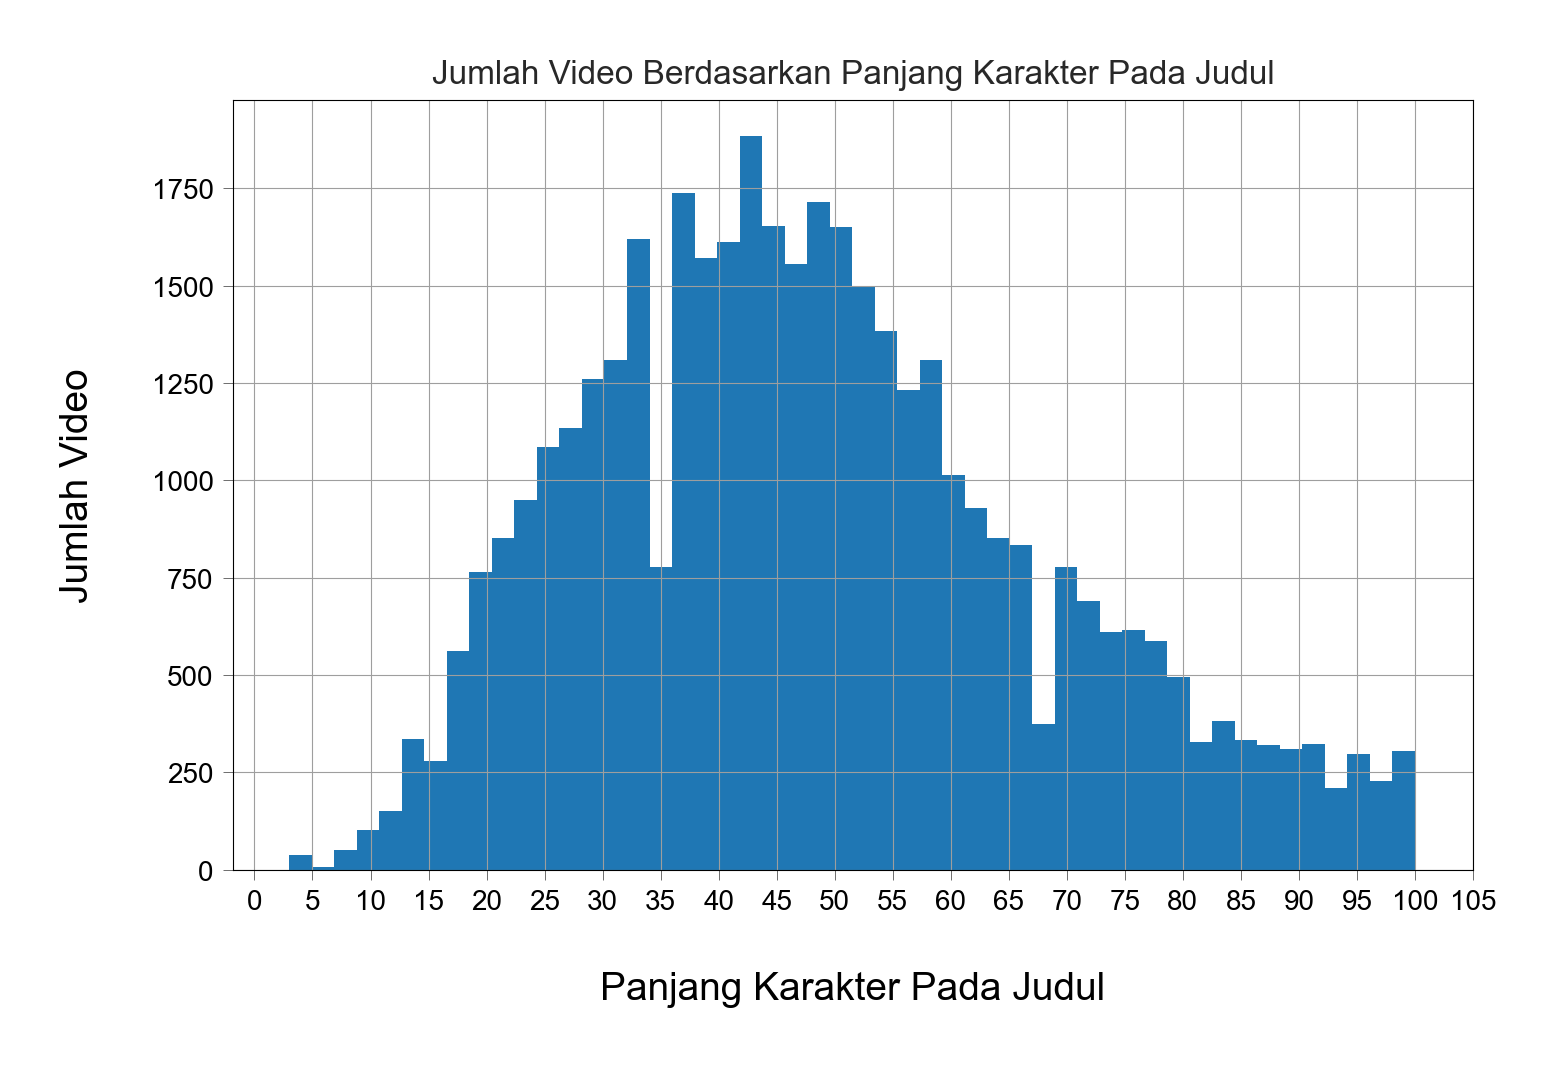

In [36]:
# jumlah video berdasarkan panjang karakter judul ('title')

yt['panjang'] = yt['title'].str.len()

fig, ax = plt.subplots()
hiss = sns.distplot(yt['panjang'], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
hiss = ax.set(xlabel='Panjang Karakter Pada Judul', ylabel='Jumlah Video', xticks=range(0, 110, 5), title='Jumlah Video Berdasarkan Panjang Karakter Pada Judul')

Dapat dilihat kalau kebanyakan video memiliki panjang judul antara 35 - 55 karakter. Maka dari itu apabila ingin membuat video youtube disarankan untuk membuat judul video yang tidak terlalu panjang tapi tidak terlalu pendek juga, optimalnya karakter berjumlah sedang.

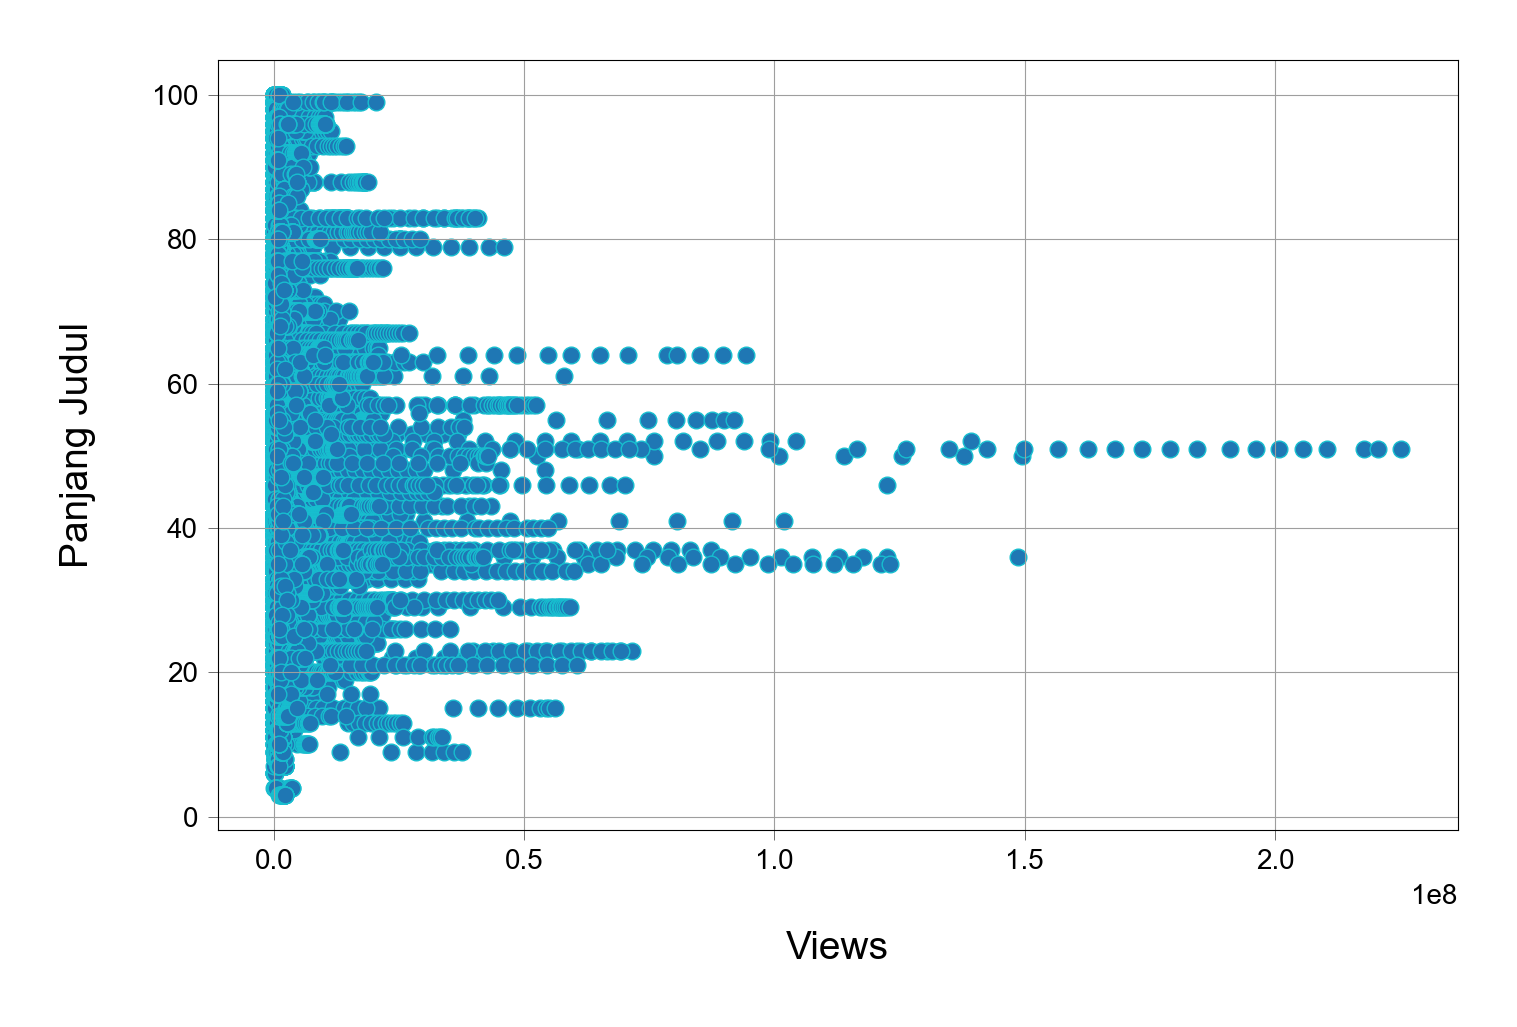

In [37]:
# panjang karakter judul berdasarkan views
fig, ax = plt.subplots()
scat = ax.scatter(x=yt['views'], y=yt['panjang'], edgecolors='#17becf', linewidths=0.5)
scat = ax.set(xlabel='Views', ylabel='Panjang Judul')

Dapat dilihat grafik jumlah views berdasarkan panjang judul tidak terlalu berbeda jauh dengan grafik sebelumnya. Judul yang mempunyai karakter sebanyak 35 - 55 mempunyai views paling banyak, dengan video dengan karakter berjumlah sekitar 51 mempunyai views paling banyak. Sampai dengan 200.000.000 views.

In [38]:
# jumlah video yang dalam judulnya terdiri dari huruf kapital semua, huruf kecil semua, dan campuran

def kapital(k):
    for h in k.split() :
        if h.islower() :
            return 'Semua Huruf Kecil'
        elif h.isupper() :
            return 'Semua Huruf Kapital'
        else :
            return 'Campuran'


yt['judul_kapital'] = yt['title'].apply(kapital)
jml_kapital = yt['judul_kapital'].value_counts().to_dict()
table = pd.crosstab(index=yt['judul_kapital'], columns='Total')
table['Percentase'] = table/table.sum()*100
table


col_0                Total  Percentase
judul_kapital                         
Campuran             32424  79.274345 
Semua Huruf Kapital  7973   19.493411 
Semua Huruf Kecil    504    1.232244

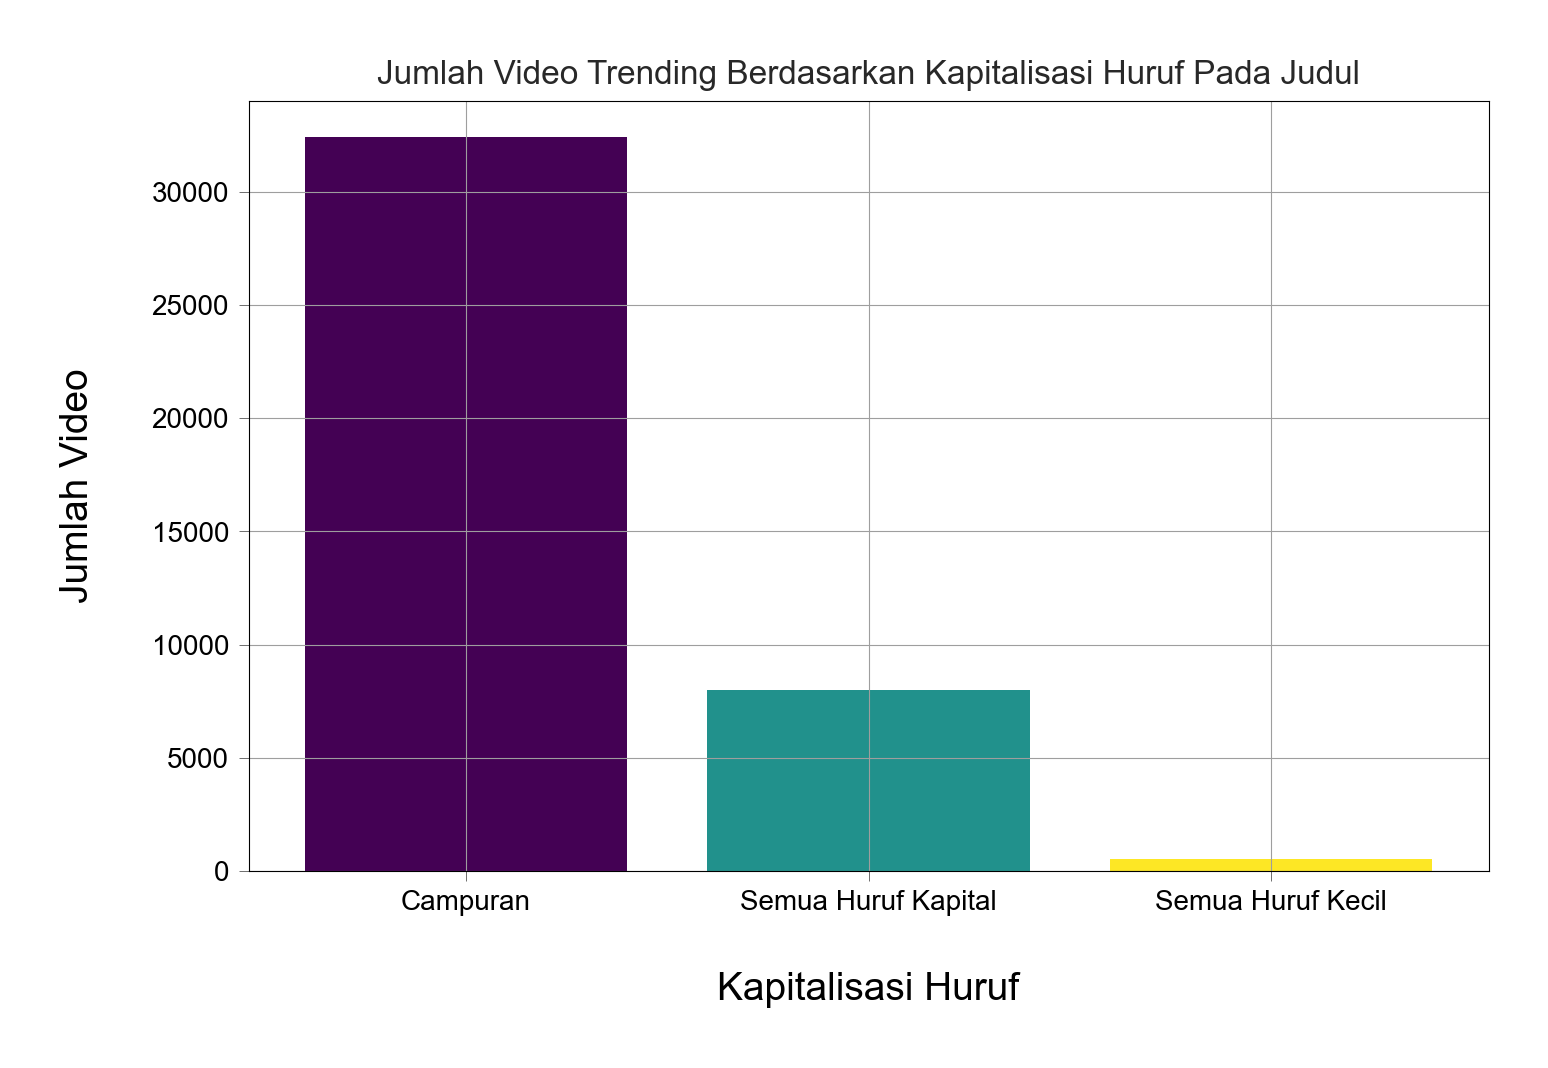

In [39]:
import matplotlib.cm as cm

jml_kapital = yt['judul_kapital'].value_counts().to_dict()

categories = list(jml_kapital.keys())
values = list(jml_kapital.values())

colormap = cm.get_cmap('viridis')
colors = [colormap(i) for i in np.linspace(0, 1, len(categories))]
plt.bar(categories, values, color=colors)
plt.xlabel('Kapitalisasi Huruf')
plt.ylabel('Jumlah Video')
plt.title('Jumlah Video Trending Berdasarkan Kapitalisasi Huruf Pada Judul')
plt.show()


Dari grafik di atas, dapat dilihat bahwa video dengan kapitalisasi judul campuran, yaitu memiliki huruf kapital dan juga huruf kecil masuk ke halaman trending terbanyak. Oleh karena itu disarankan menulis judul dengan bentuk kalimat yang menggunakan kombinasi keduanya, tidak semua huruf kapital apalagi semua huruf kecil. 

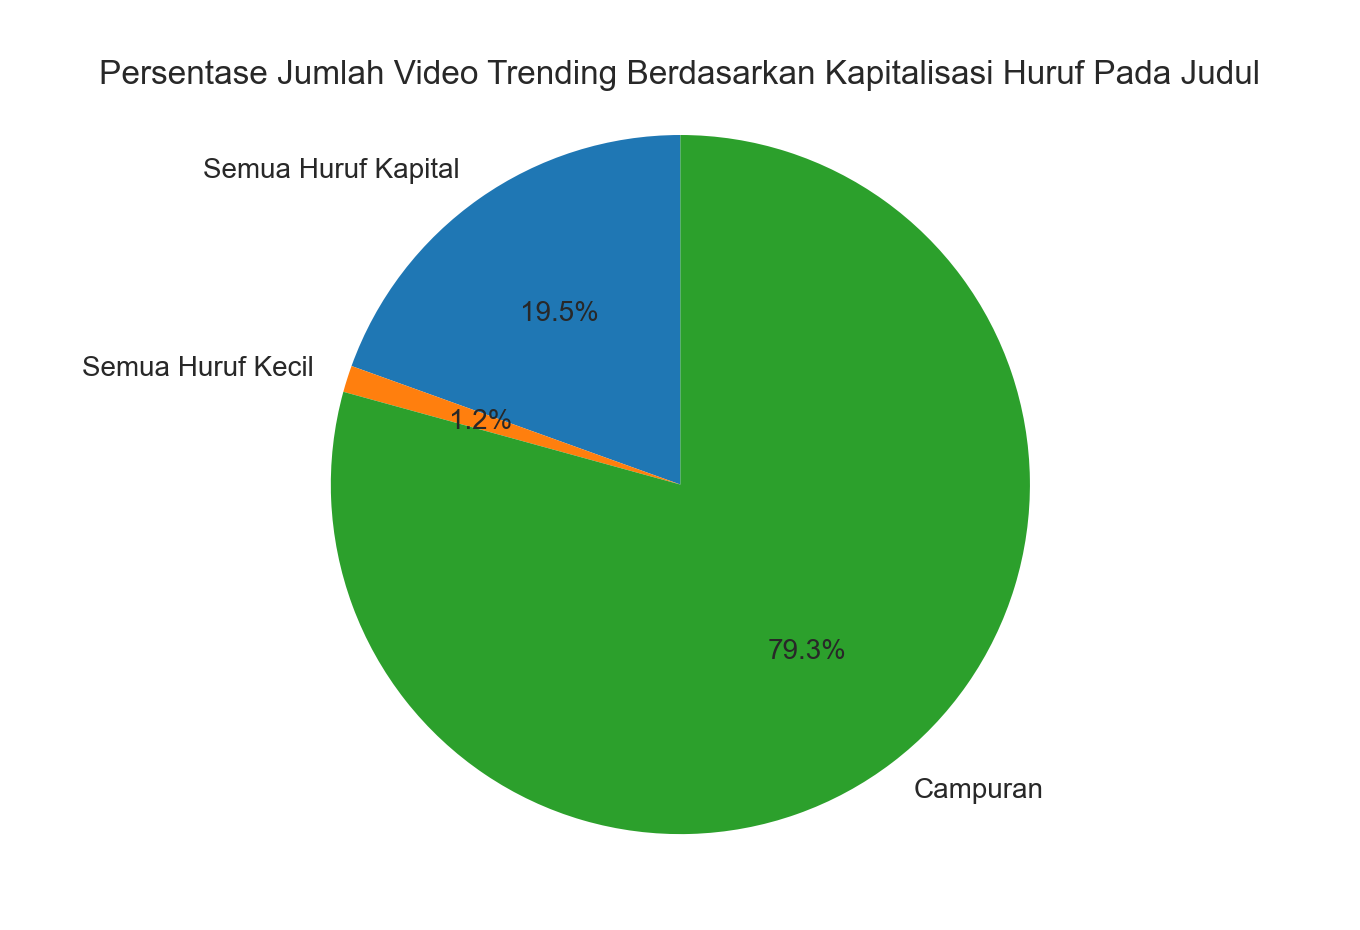

In [40]:
fig, ax = plt.subplots()
pie = ax.pie([jml_kapital['Semua Huruf Kapital'], jml_kapital['Semua Huruf Kecil'], jml_kapital['Campuran']], labels=['Semua Huruf Kapital', 'Semua Huruf Kecil', 'Campuran'], startangle=90, autopct='%1.1f%%')
pie = ax.axis('equal')
pie = ax.set_title('Persentase Jumlah Video Trending Berdasarkan Kapitalisasi Huruf Pada Judul')

## Kolom `channel`

Pada kolom `channel` kita akan mencoba menganalisis beberapa pertanyaan yang dapat diambil dari kolom `channel`, berikut pertanyaannya :
* channel dengan jumlah video trending terbanyak 
* channel dengan jumlah views terbanyak

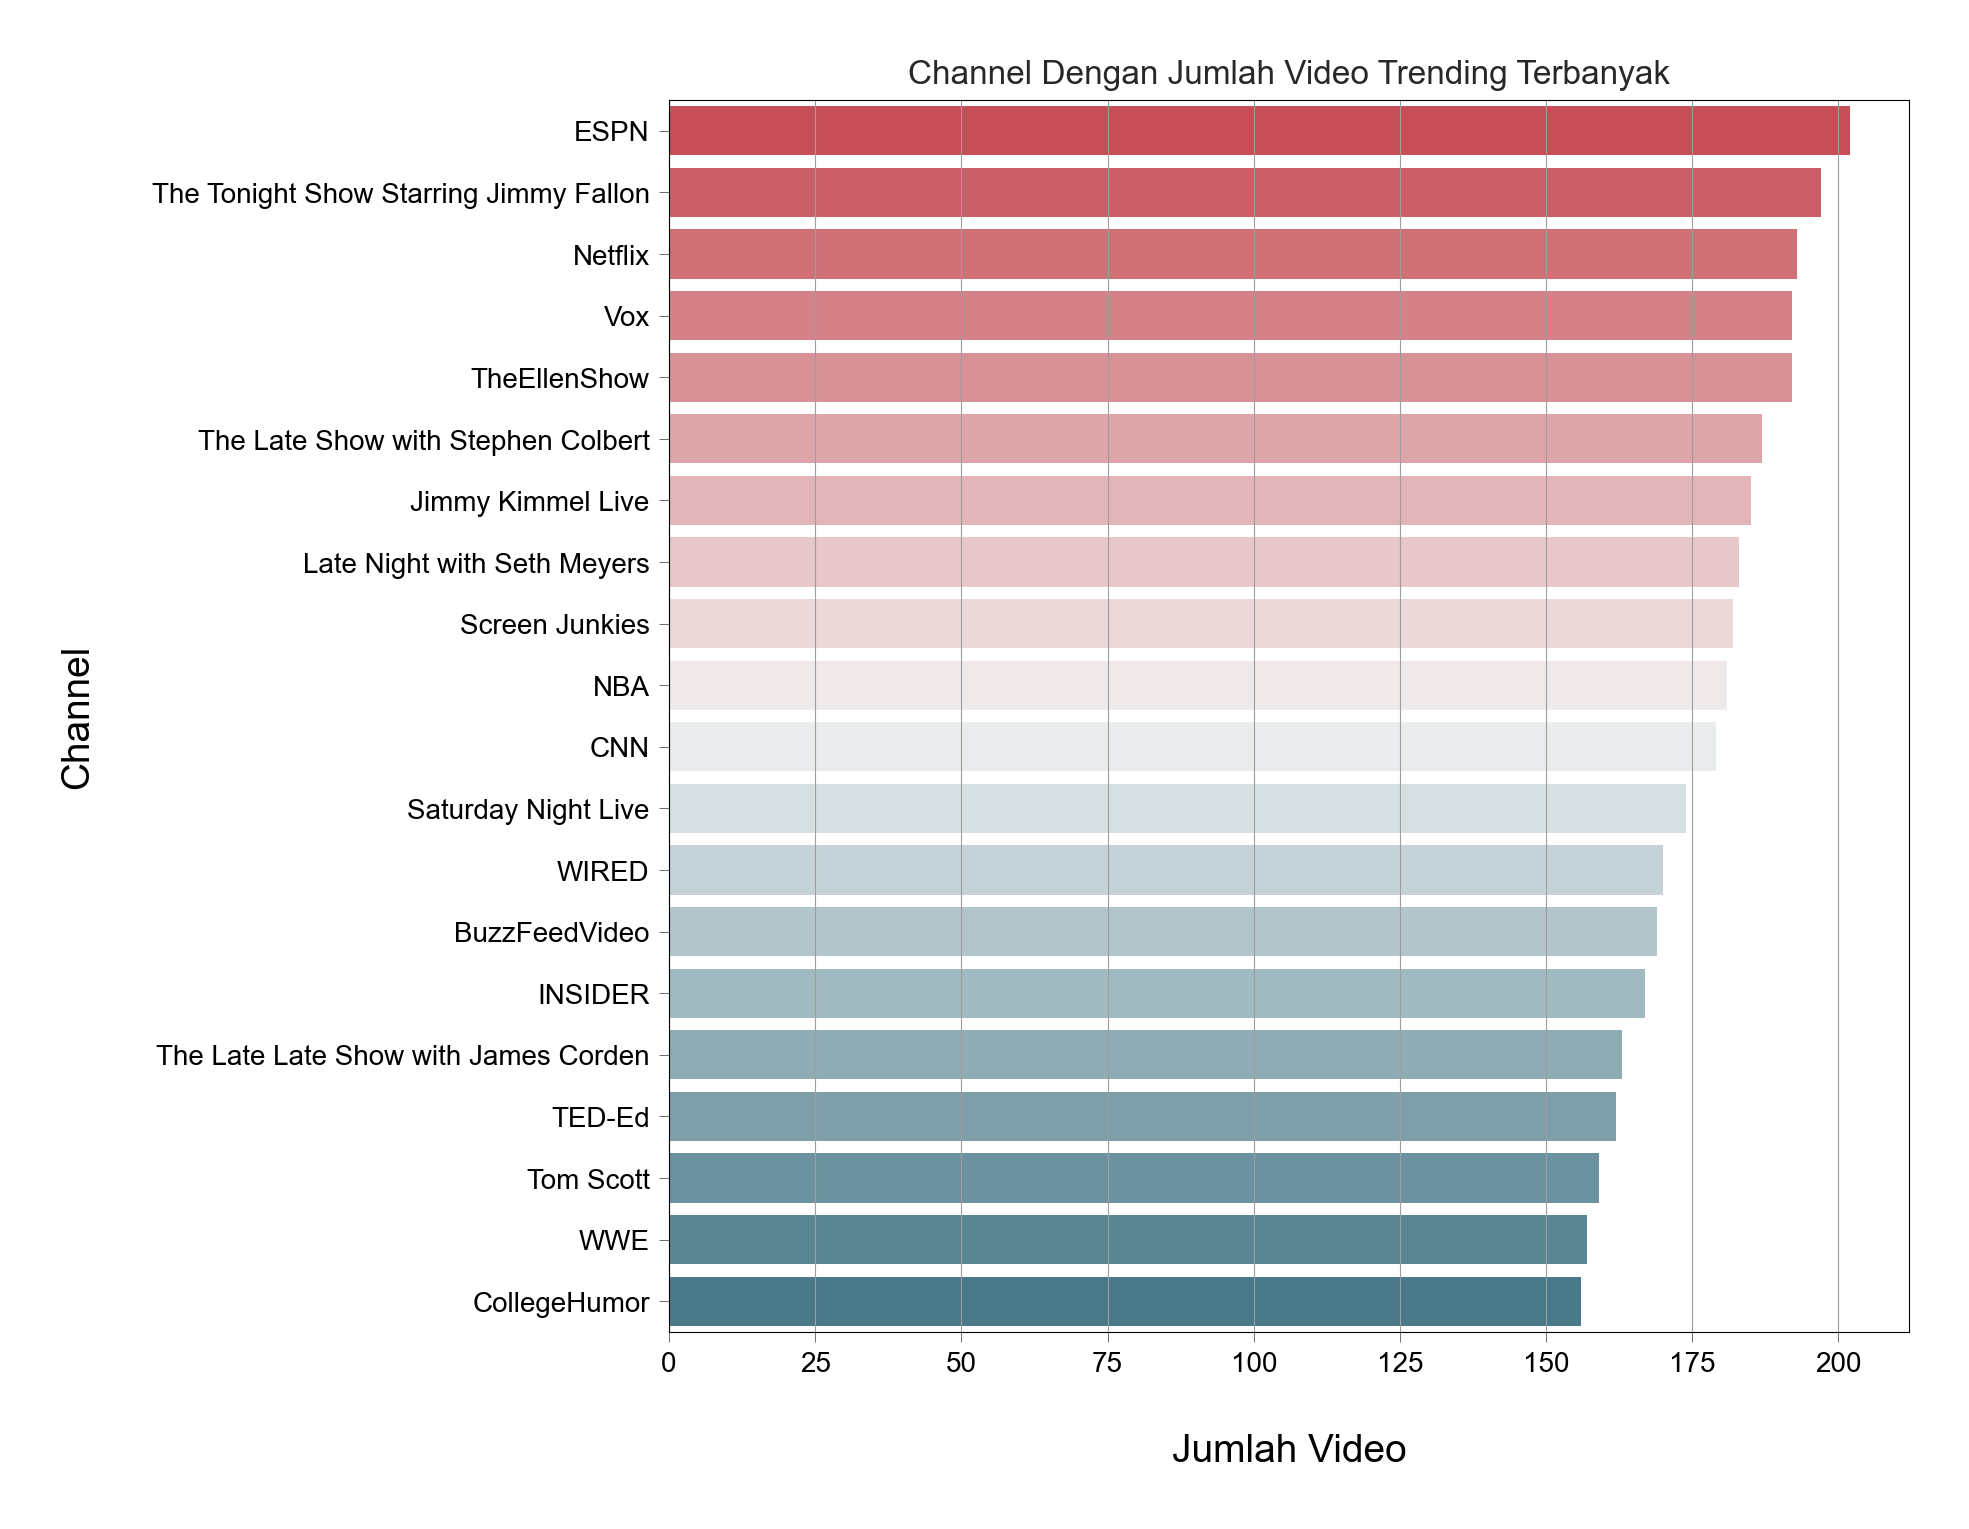

In [41]:
# channel dengan jumlah video trending terbanyak

channel = yt.groupby('channel_title').size().reset_index(name='jumlah') \
    .sort_values('jumlah', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
bar2 = sns.barplot(x='jumlah', y='channel_title', data=channel,
                palette=sns.diverging_palette(10, 220, n=20), ax=ax)
bar2 = ax.set(xlabel='Jumlah Video', ylabel='Channel', title='Channel Dengan Jumlah Video Trending Terbanyak')

Dari plot di atas kita dapat lihat banyak channel talkshow contohnya Jimmy Fallon, EllenShow, & Stephen Colbert yang videonya masuk ke halaman trending, oleh karena itu disarankan capres dari juru kampanye berikut melakukan kolaborasi dengan channel-channel tersebut, dapat berupa menjadi tamu di talkshow tersebut atau membuat video yang akan diunggah oleh channel talkshow tersebut. Tidak menutup kemungkinan bekerja sama dengan channel-channel lain, tetapi saya rasa akan sedikit sulit berkolaborasi dengan channel olahraga seperti ESPN atau channel entertainment seperti Netflix dalam rangka berkampanye.

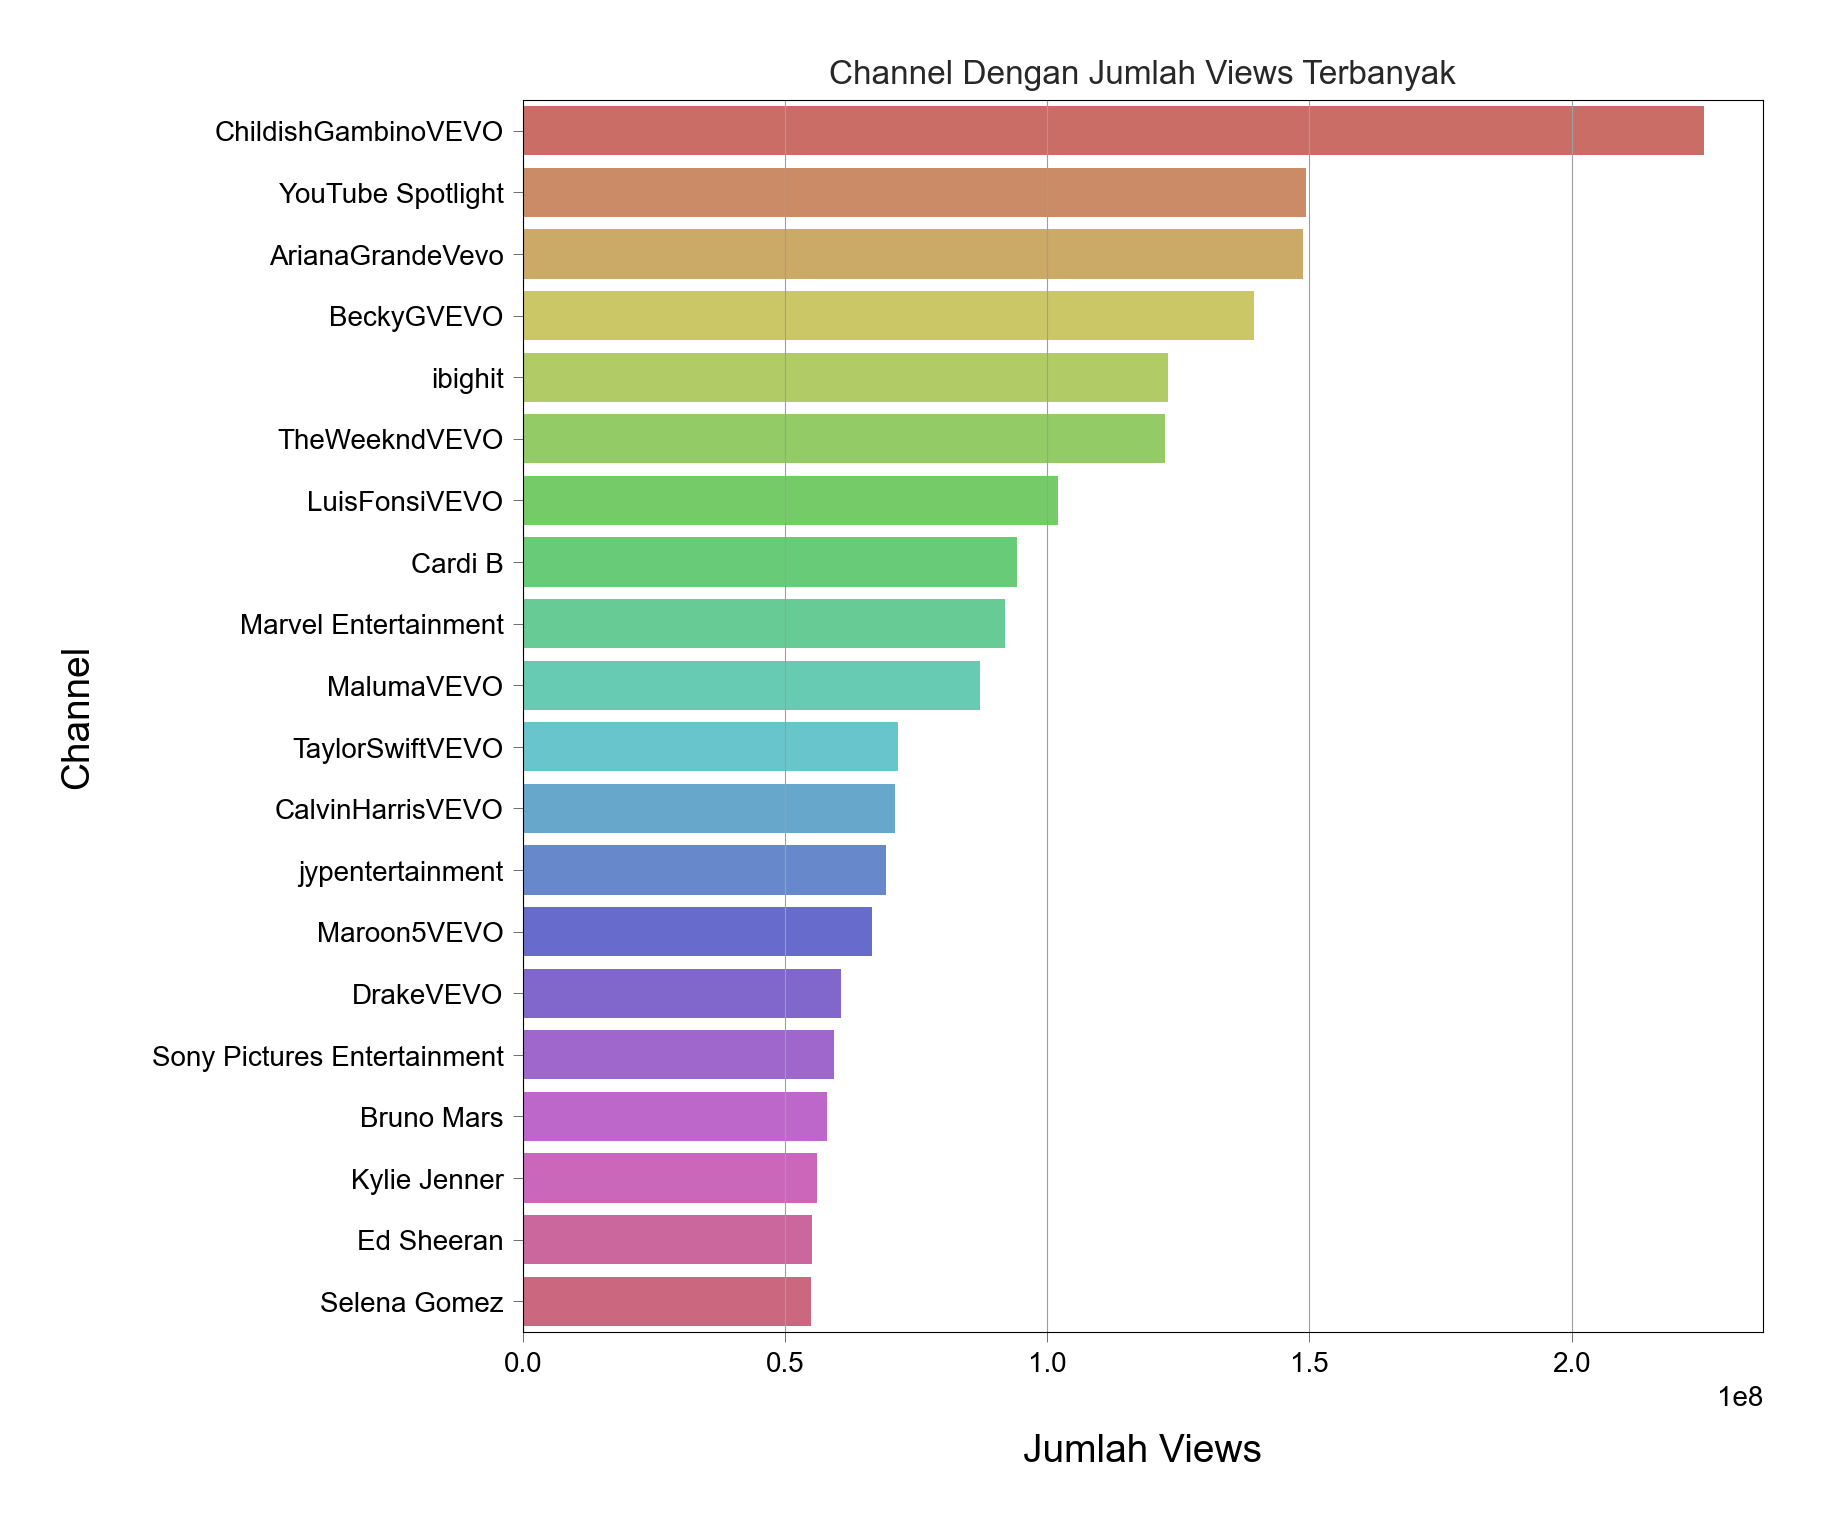

In [42]:
# channel dengan jumlah views terbanyak

channel = yt.groupby('channel_title').agg({'views': 'max'}) \
    .reset_index().sort_values('views', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
bar2 = sns.barplot(x='views', y='channel_title', data=channel,
                palette=sns.hls_palette(n_colors=20), ax=ax)
bar2 = ax.set(xlabel='Jumlah Views', ylabel='Channel', title= 'Channel Dengan Jumlah Views Terbanyak')


Apabila dibuat plot menggunakan jumlah views daripada jumlah video trending, dapat dilihat bahwa channel youtube musisi mempunyai video trending dengan jumlah views terbanyak. Juru kampanye dapat mencoba melakukan kolaborasi dengan beberapa channel musisi, walaupun terlihat sedikit sulit untuk mencoba bekerja sama dengan channel musisi dalam rangka berkampanye.

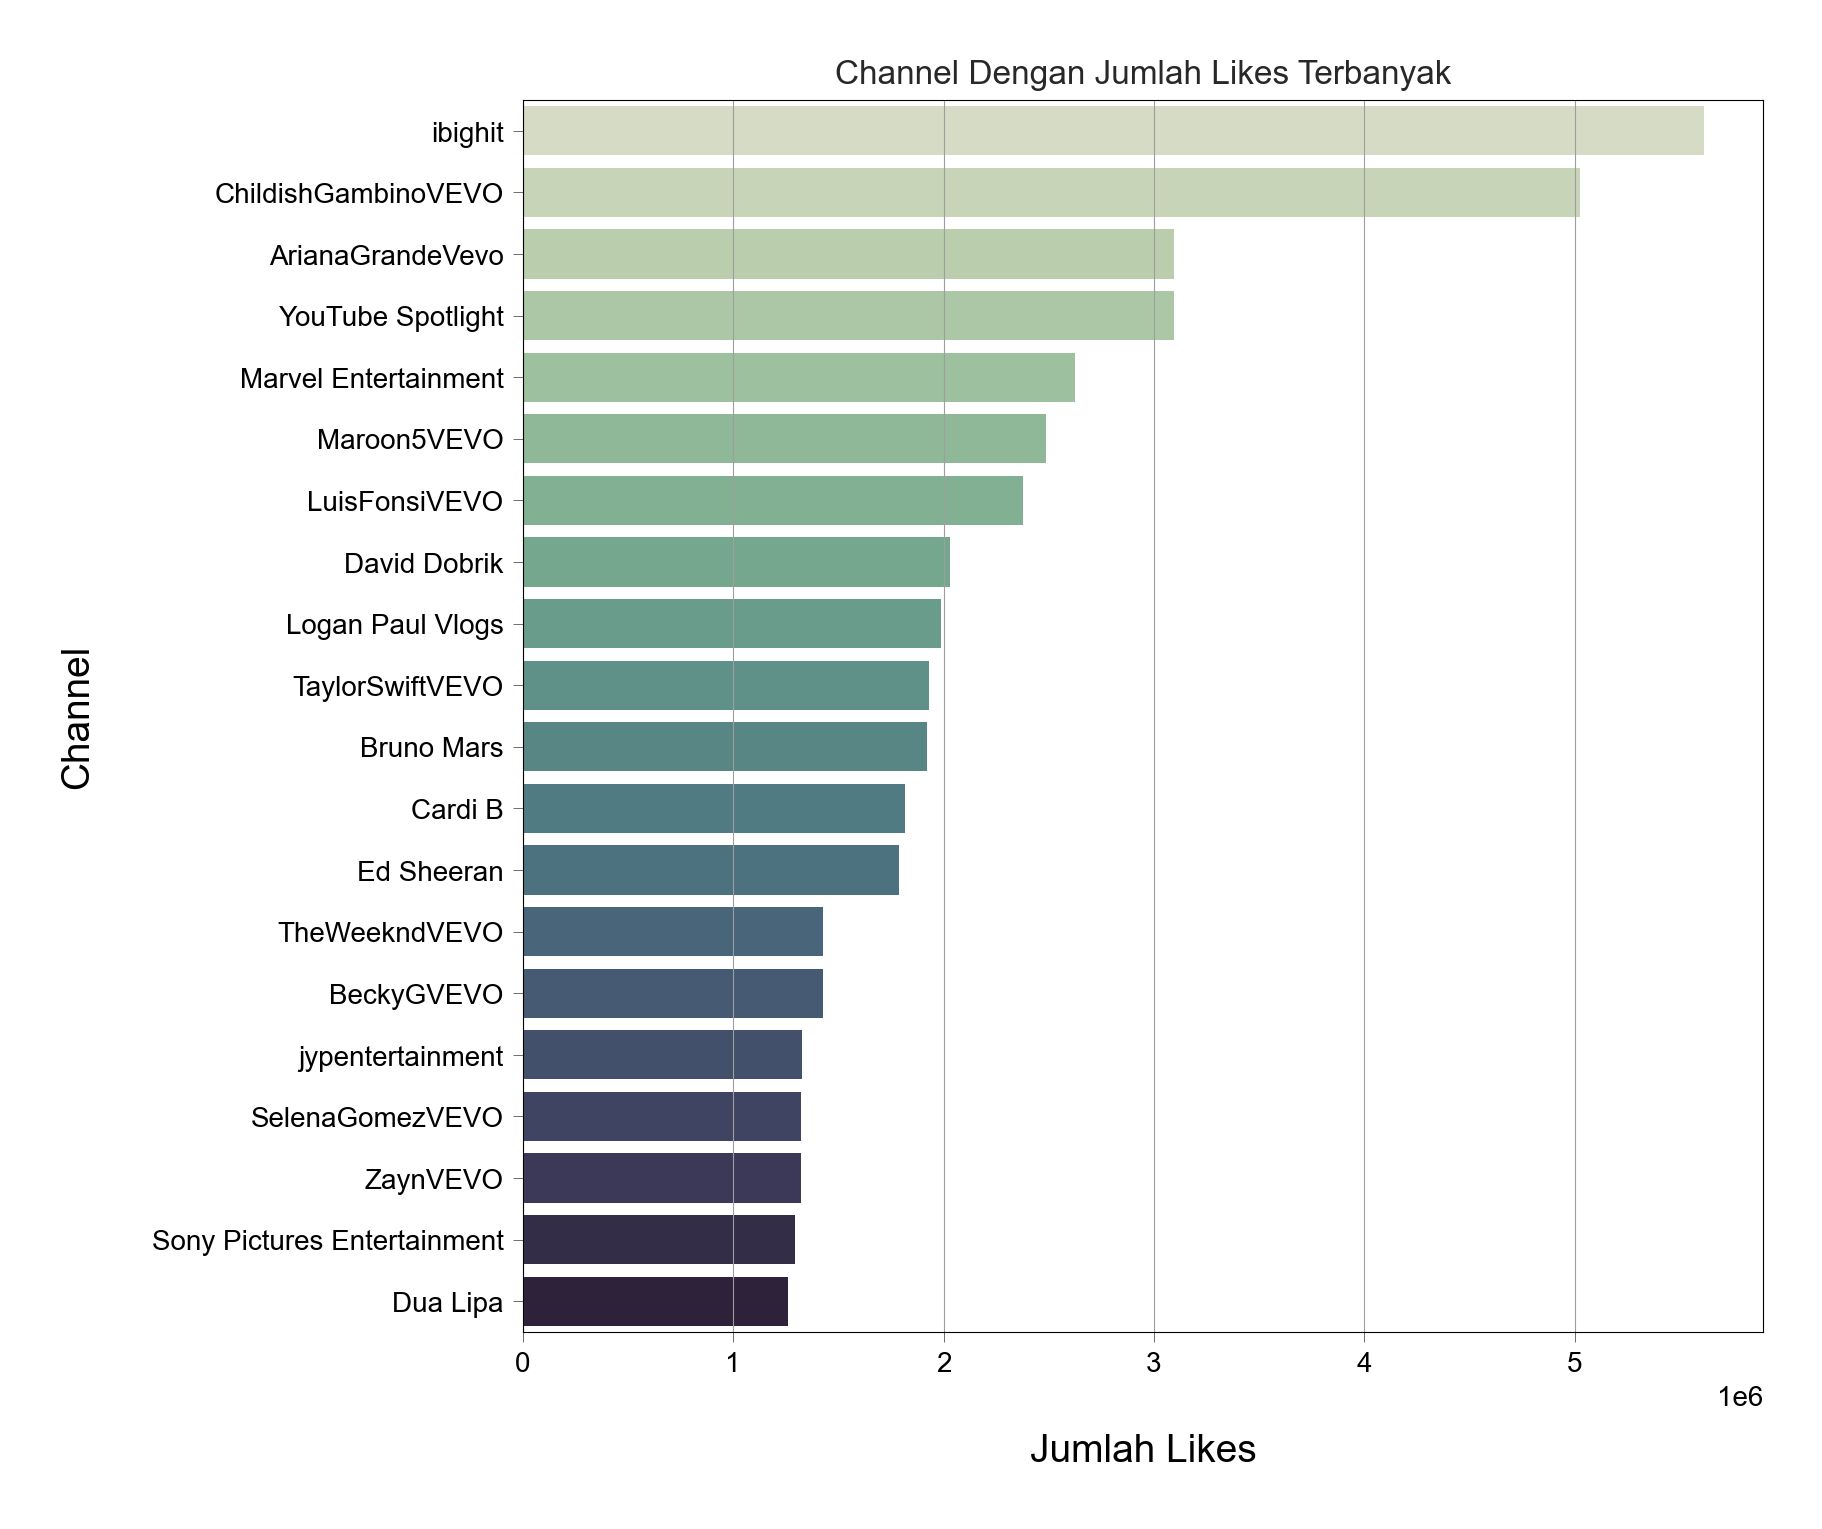

In [43]:
# channel dengan jumlah likes terbanyak

channel = yt.groupby('channel_title').agg({'likes': 'max'}) \
    .reset_index().sort_values('likes', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
bar2 = sns.barplot(x='likes', y='channel_title', data=channel,
                palette=sns.cubehelix_palette(20, start=.5, rot=-.75), ax=ax)
bar2 = ax.set(xlabel='Jumlah Likes', ylabel='Channel', title= 'Channel Dengan Jumlah Likes Terbanyak')

Dapat dilihat dari plot di atas, channel dengan jumlah likes terbanyak kurang lebih sama dengan channel dengan jumlah views terbanyak. Yaitu channel musisi, oleh karena itu tidak banyak yang bisa diambil dari plot ini.

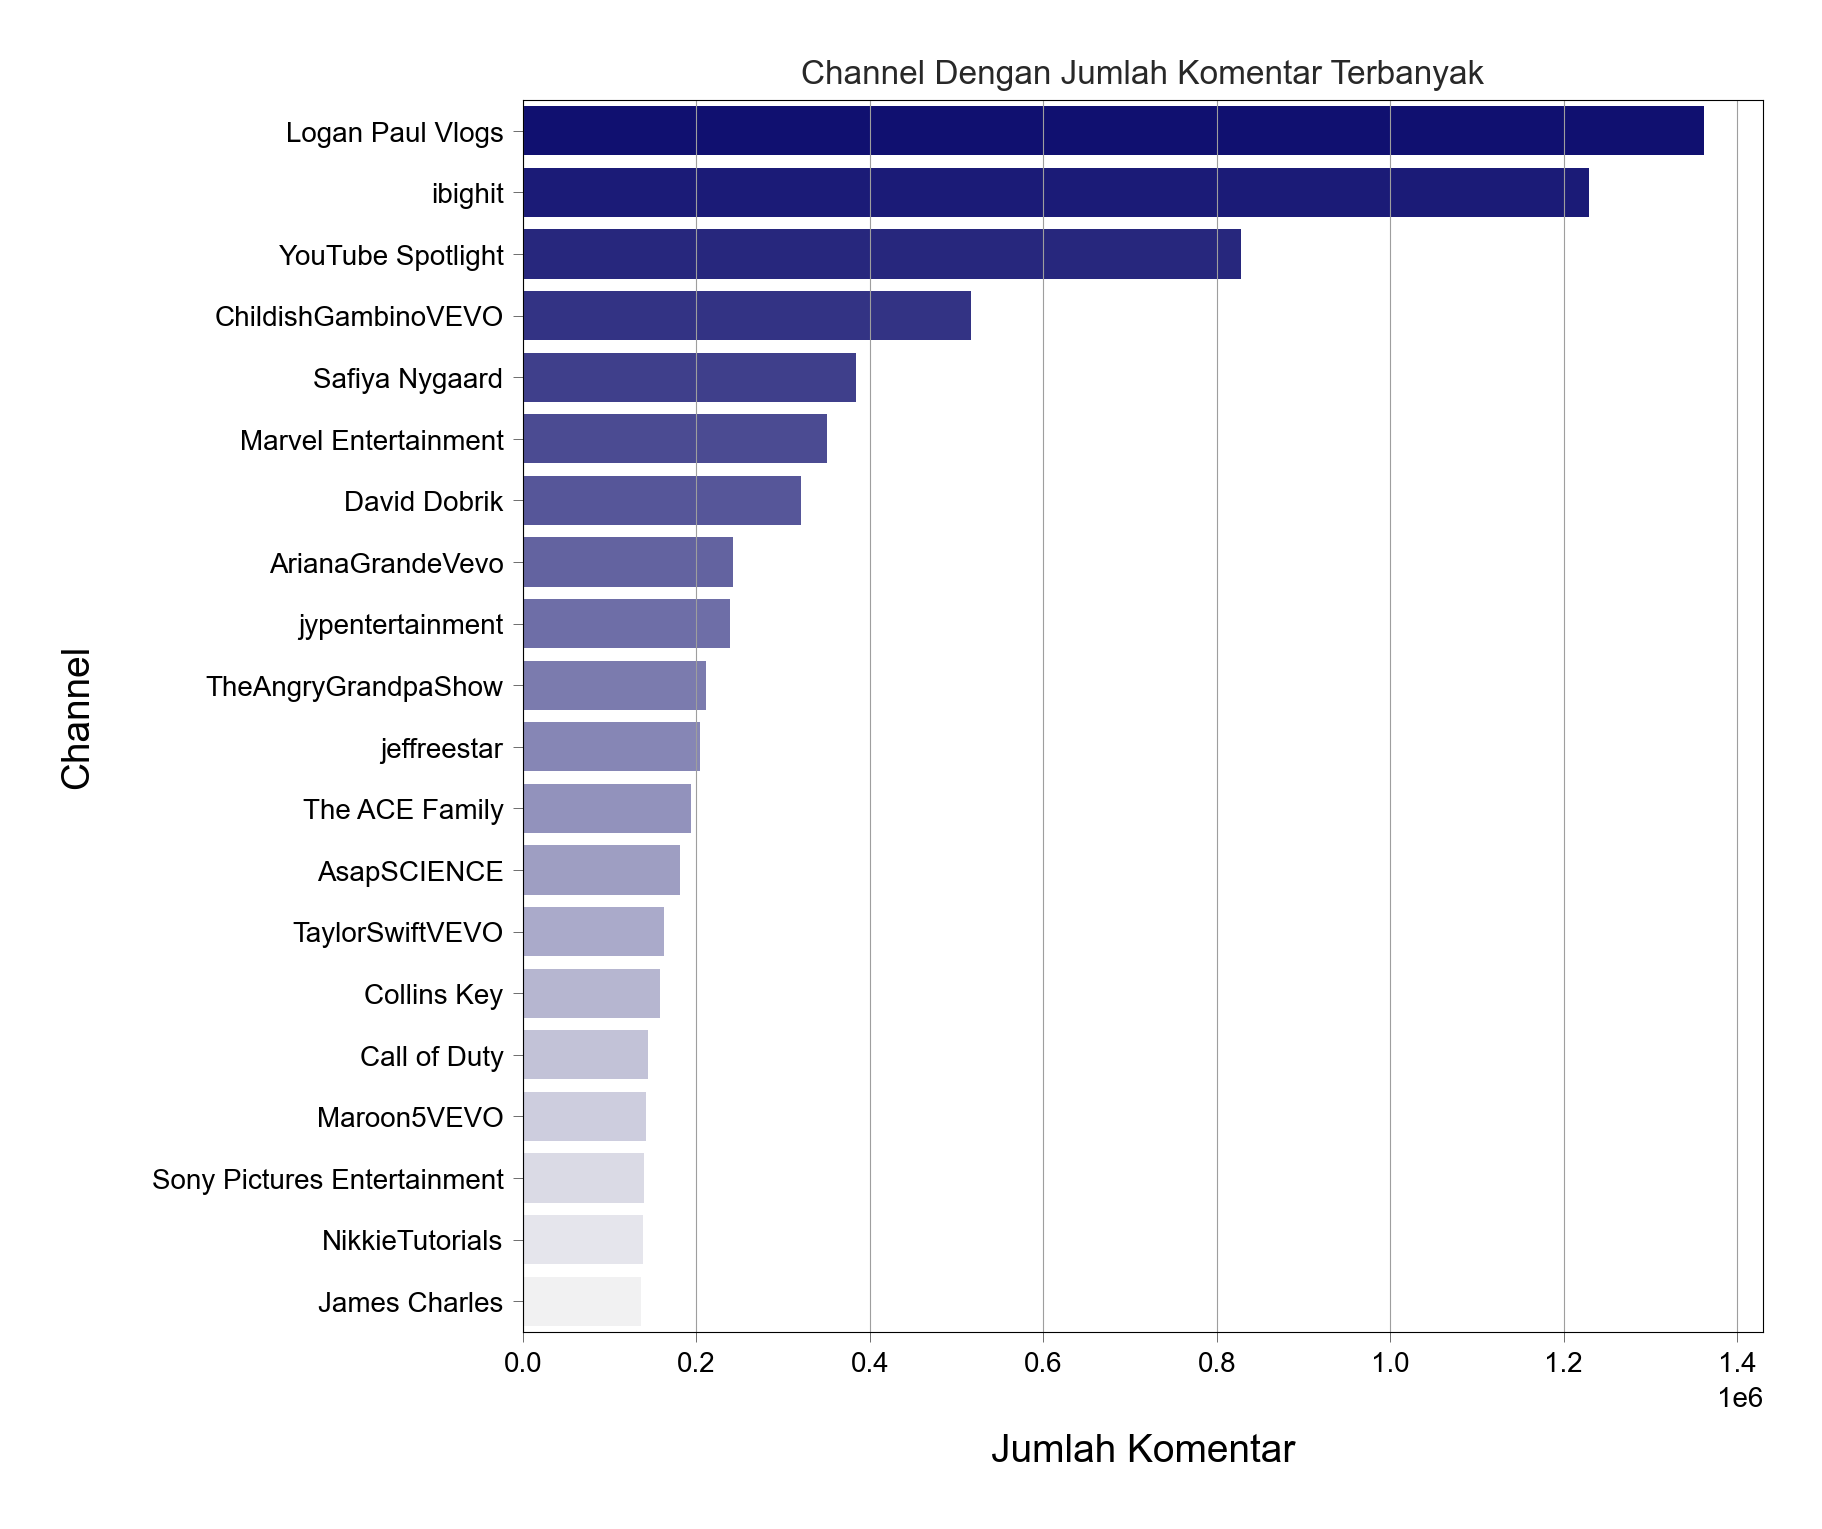

In [44]:
channel = yt.groupby('channel_title').agg({'comment_count': 'max'}) \
    .reset_index().sort_values('comment_count', ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
bar2 = sns.barplot(x='comment_count', y='channel_title', data=channel,
                palette=sns.light_palette('navy', reverse=True, n_colors=20), ax=ax)
bar2 = ax.set(xlabel='Jumlah Komentar', ylabel='Channel', title= 'Channel Dengan Jumlah Komentar Terbanyak')

Logan Paul Vlogs mempunyai jumlah komentar paling banyak di channelnya, terdapat kemungkinan untuk bekerja sama dengan channel tersebut untuk mendapatkan video yang dapat masuk ke halaman trending. Tetapi untuk komentar ada faktor yang mungkin ingin dipertimbangkan, komentar dapat berupa komentar negatif, oleh karena itu harus dilakukan penyelidikan lebih lanjut.

## Kolom `category`

Pada kolom `category` kita akan mencoba menganalisis beberapa pertanyaan yang dapat diambil dari kolom `category`, berikut pertanyaannya :
* category dengan jumlah video trending terbanyak 
* category dengan jumlah views terbanyak
* category dengan jumlah likes terbanyak

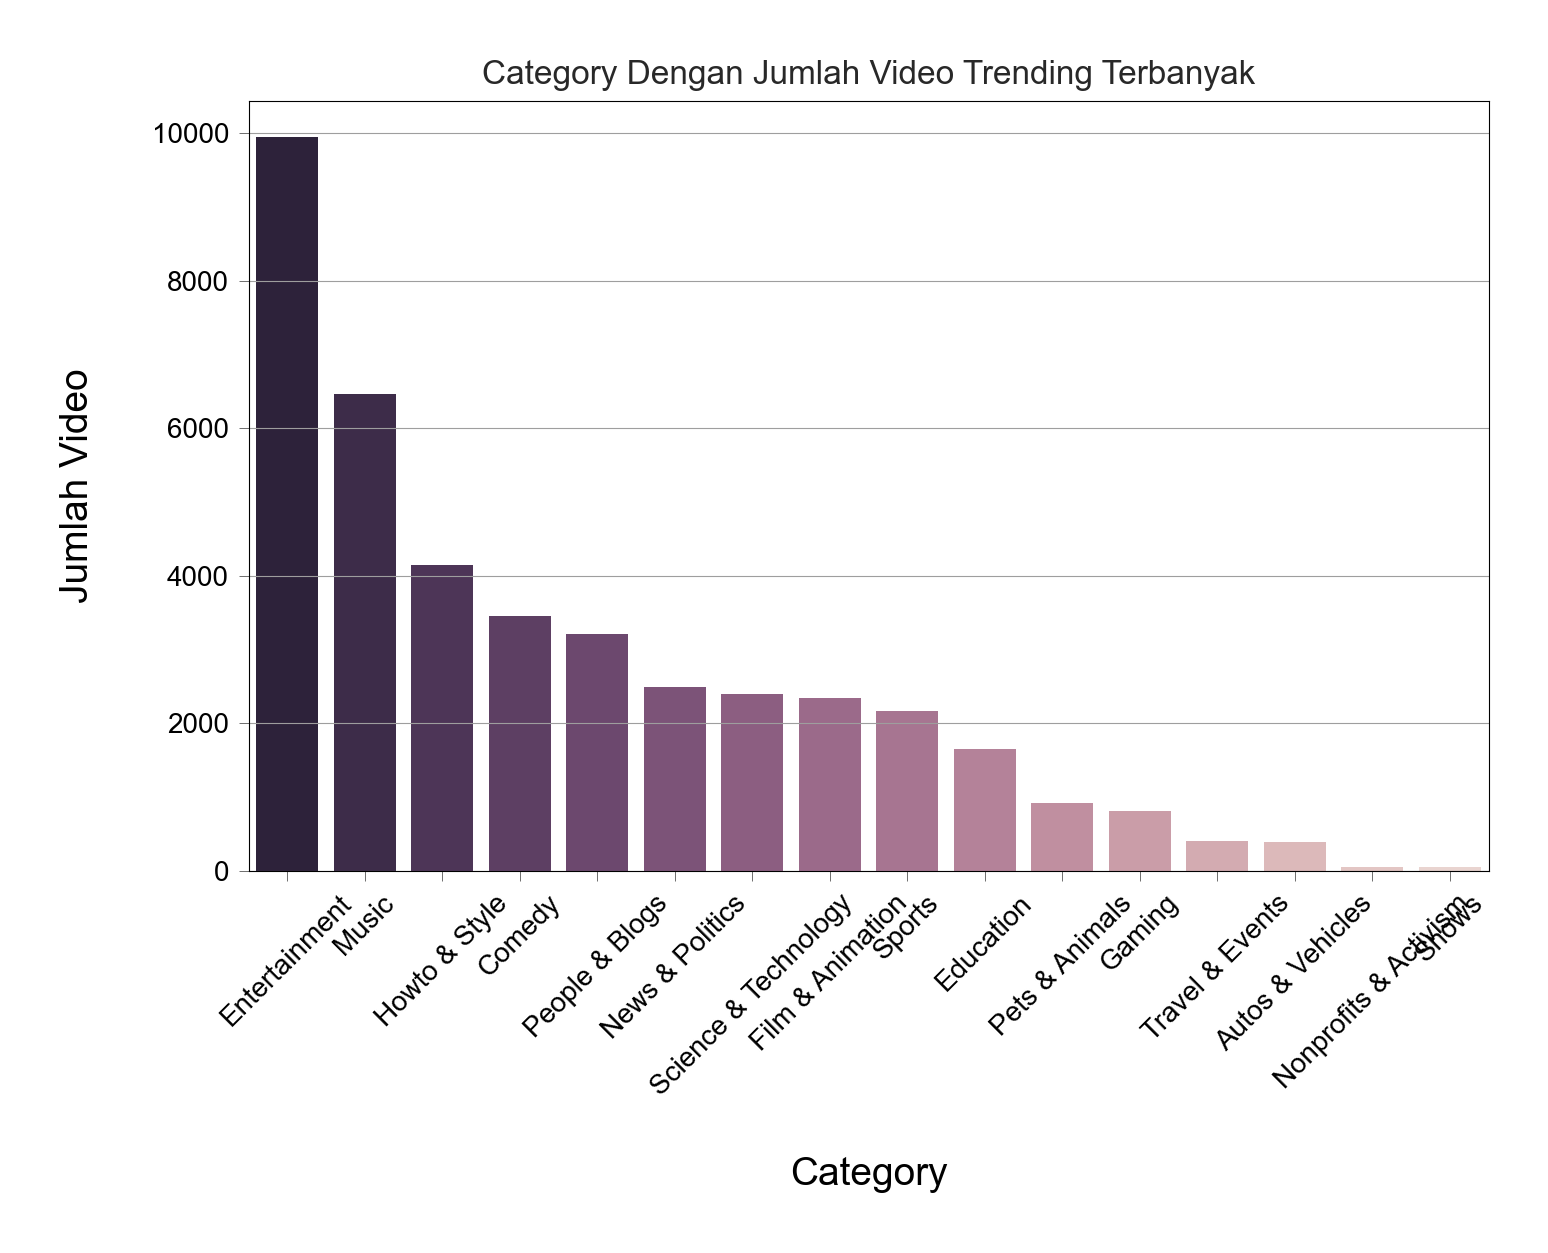

In [45]:
# category dengan jumlah video trending terbanyak

cdf = yt['category'].value_counts().to_frame().reset_index()
cdf.rename(columns={'index': 'category', 'category': 'jumlah_video'}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x='category', y='jumlah_video', data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
_ = ax.set(xlabel='Category', ylabel='Jumlah Video', title='Category Dengan Jumlah Video Trending Terbanyak')

Dari plot di atas kita dapat mengetahui category dengan jumlah video trending terbanyak adalah entertainment dan music. Oleh karena itu disarankan untuk membuat video dengan category entertainment dan music yang dibalut dengan kampanye untuk calon presiden yang diinginkan. Menurut youtube sendiri, views lumayan berpengaruh terhadap mekanisme trending suatu video, oleh karena itu plot ini berguna untuk dianalisis. Mengapa saya tidak menyarankan category how to & style dan comedy dikarenakan video berkategori how to & style dan comedy tidak terlalu fleksibel untuk dapat digunakan sebagai category yang dapat dibalut dengan kampanye seorang calon presiden.

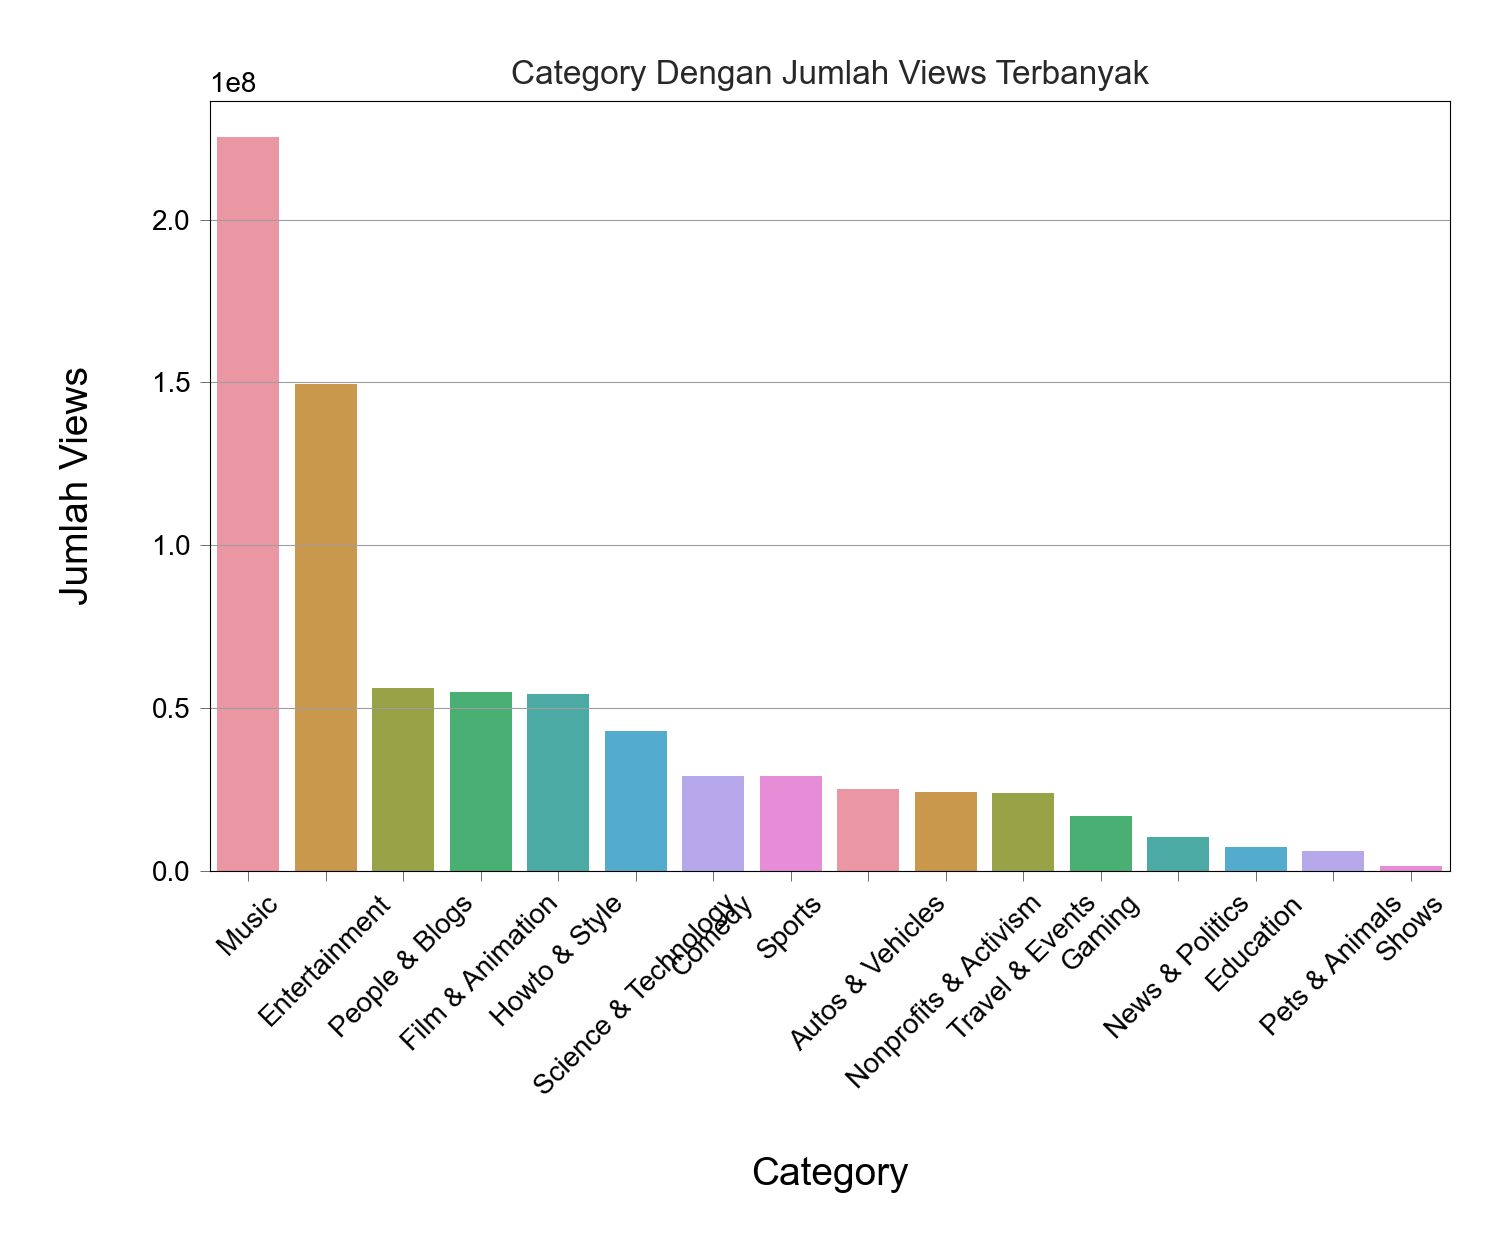

In [46]:
# category dengan jumlah views terbanyak

cdf = yt.groupby('category').agg({'views': 'max'}) \
    .reset_index().sort_values('views', ascending=False)
cdf.rename(columns={'views': 'total_views'}, inplace=True)

fig, ax = plt.subplots()
_ = sns.barplot(x='category', y='total_views', data=cdf, 
                palette=sns.husl_palette(8, l=.7), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
_ = ax.set(xlabel='Category', ylabel='Jumlah Views', title='Category Dengan Jumlah Views Terbanyak')


Di plot category dengan jumlah views terbanyak pun category entertainment dan music masih menjadi nomor 1 & 2, oleh karena itu dalam pembuatan video lebih dapat difokuskan di category music dan entertainment, sedangkan untuk tambahan category people & blogs dan film & animation dapat menjadi pertimbangan atau second option.

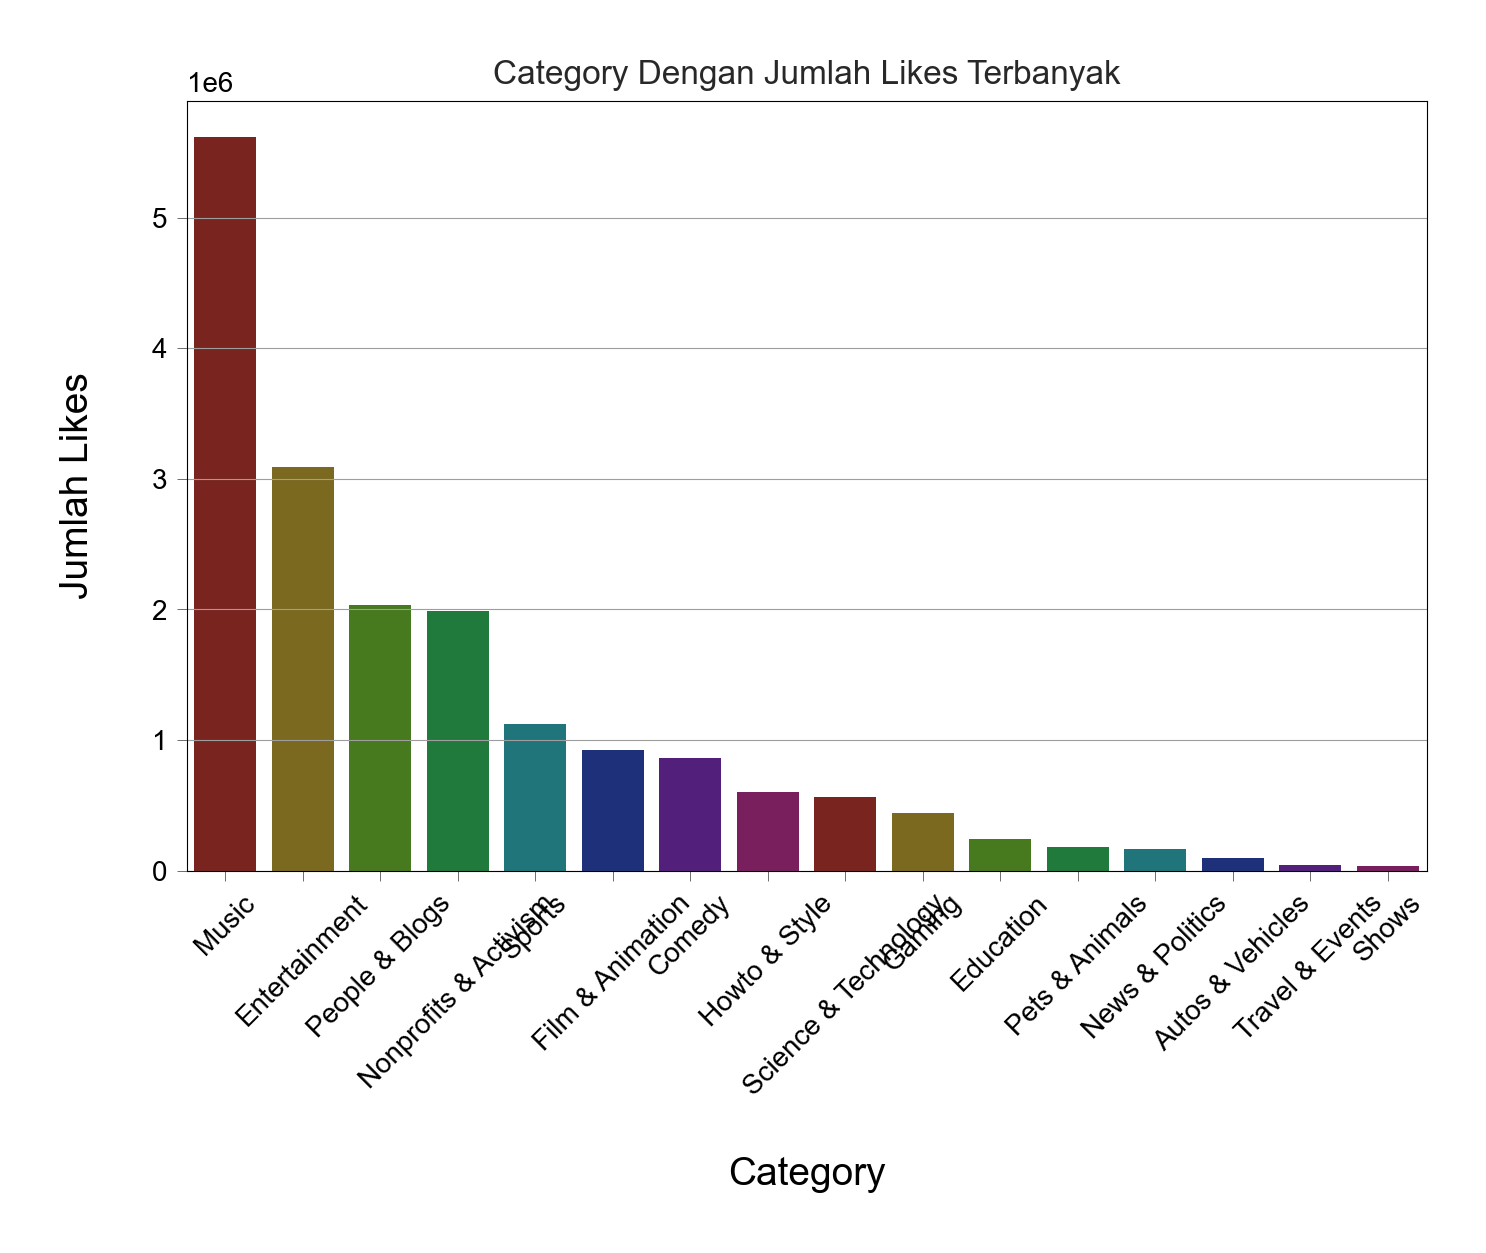

In [47]:
# category dengan jumlah likes terbanyak
cdf = yt.groupby('category').agg({'likes': 'max'}) \
    .reset_index().sort_values('likes', ascending=False)
cdf.rename(columns={'likes': 'total_likes'}, inplace=True)

fig, ax = plt.subplots()
_ = sns.barplot(x='category', y='total_likes', data=cdf, 
                palette=sns.hls_palette(8, l=.3, s=.8), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
_ = ax.set(xlabel='Category', ylabel='Jumlah Likes', title='Category Dengan Jumlah Likes Terbanyak')

Hasil plot category dengan jumlah likes terbanyak masih sama dengan 2 plot di atas, oleh karena itu saran saya masih sama seperti di atas, untuk fokus membuat video dengan category music dan entertainment, & dapat dipertimbangkan untuk membuat di category people & blogs karena untuk plot ini category tersebut masih ada di urutan ketiga.

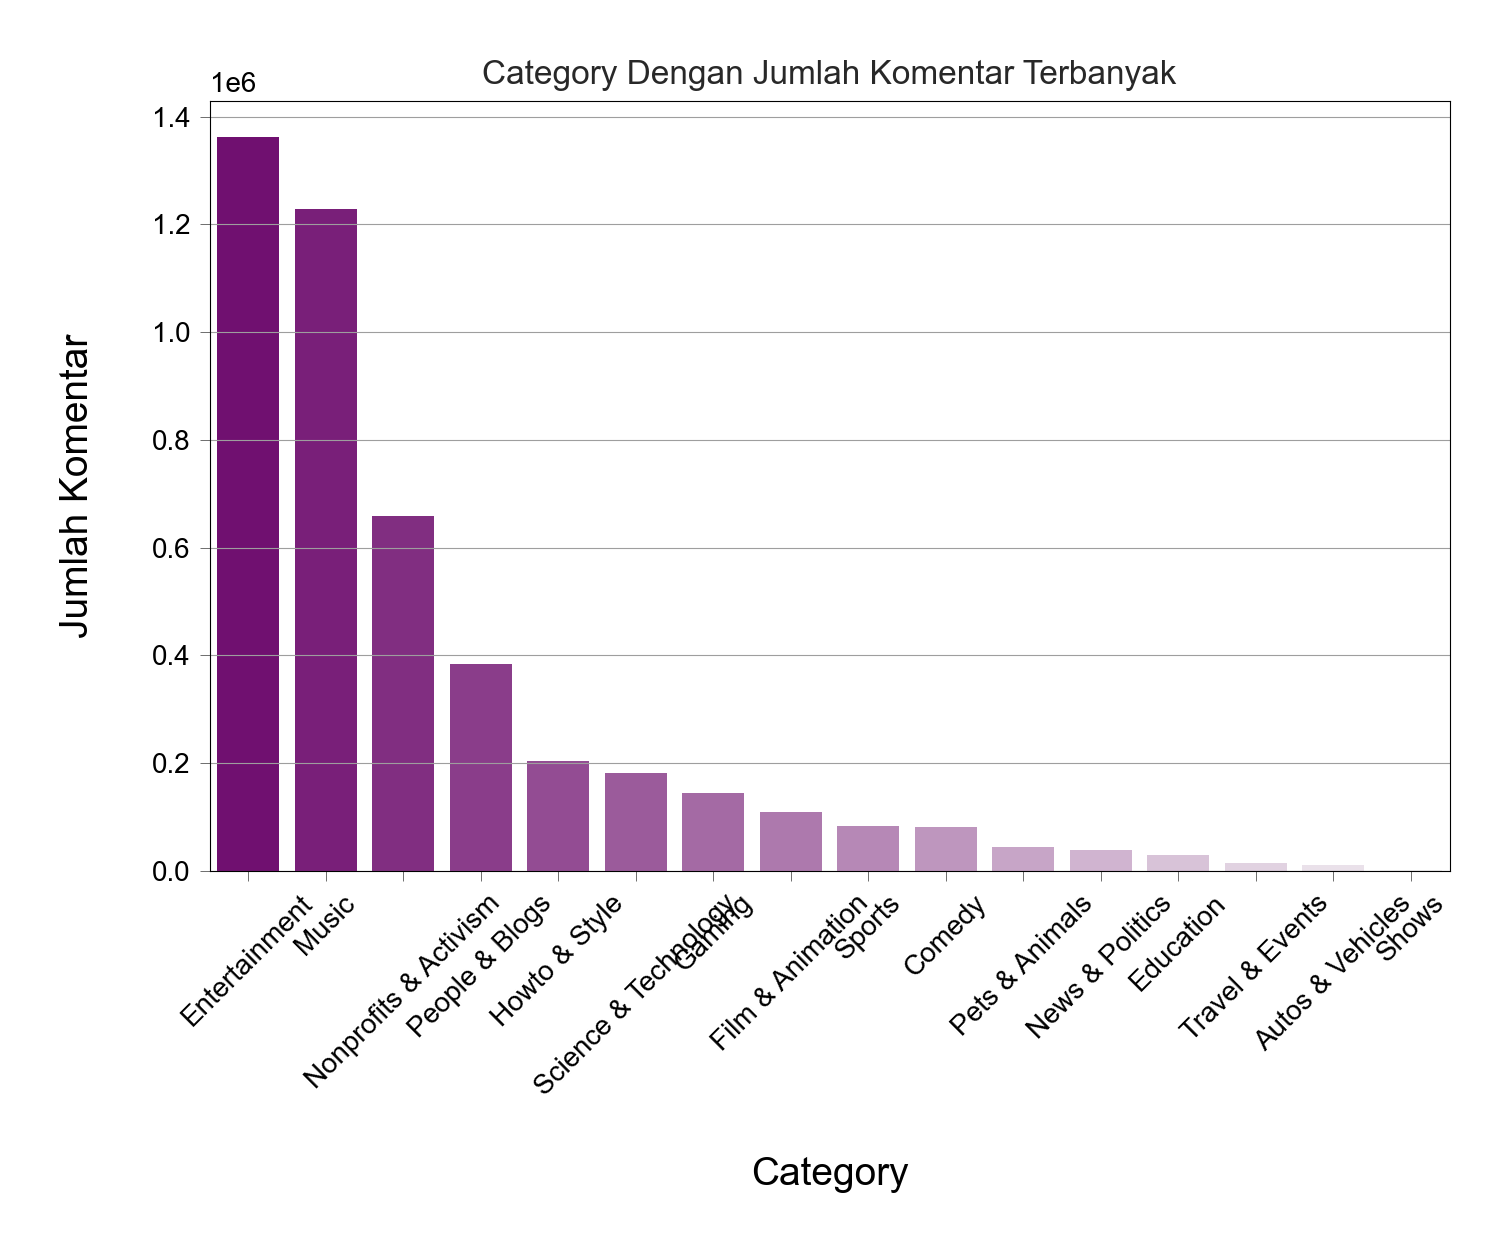

In [48]:
# category dengan jumlah likes terbanyak
cdf = yt.groupby('category').agg({'comment_count': 'max'}) \
    .reset_index().sort_values('comment_count', ascending=False)
cdf.rename(columns={'comment_count': 'jumlah_komentar'}, inplace=True)

fig, ax = plt.subplots()
_ = sns.barplot(x='category', y='jumlah_komentar', data=cdf, 
                palette=sns.light_palette('purple', reverse=True, n_colors=16), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
_ = ax.set(xlabel='Category', ylabel='Jumlah Komentar', title='Category Dengan Jumlah Komentar Terbanyak')

Plot category dengan jumlah komentar terbanyak makin menguatkan bahwa juru kampanye harus membuat video youtube yang berkategori entertainment atau music. Dikarenakan entertainment & music menjadi 2 kategori yang video-videonya paling banyak dikomentari oleh orang.

## Kolom `publish_day`

Pada kolom `publish_day` kita akan mencoba menganalisis beberapa pertanyaan yang dapat diambil dari kolom `publish_day`, berikut pertanyaannya :
* hari dengan jumlah video trending terbanyak 
* hari dengan jumlah views terbanyak


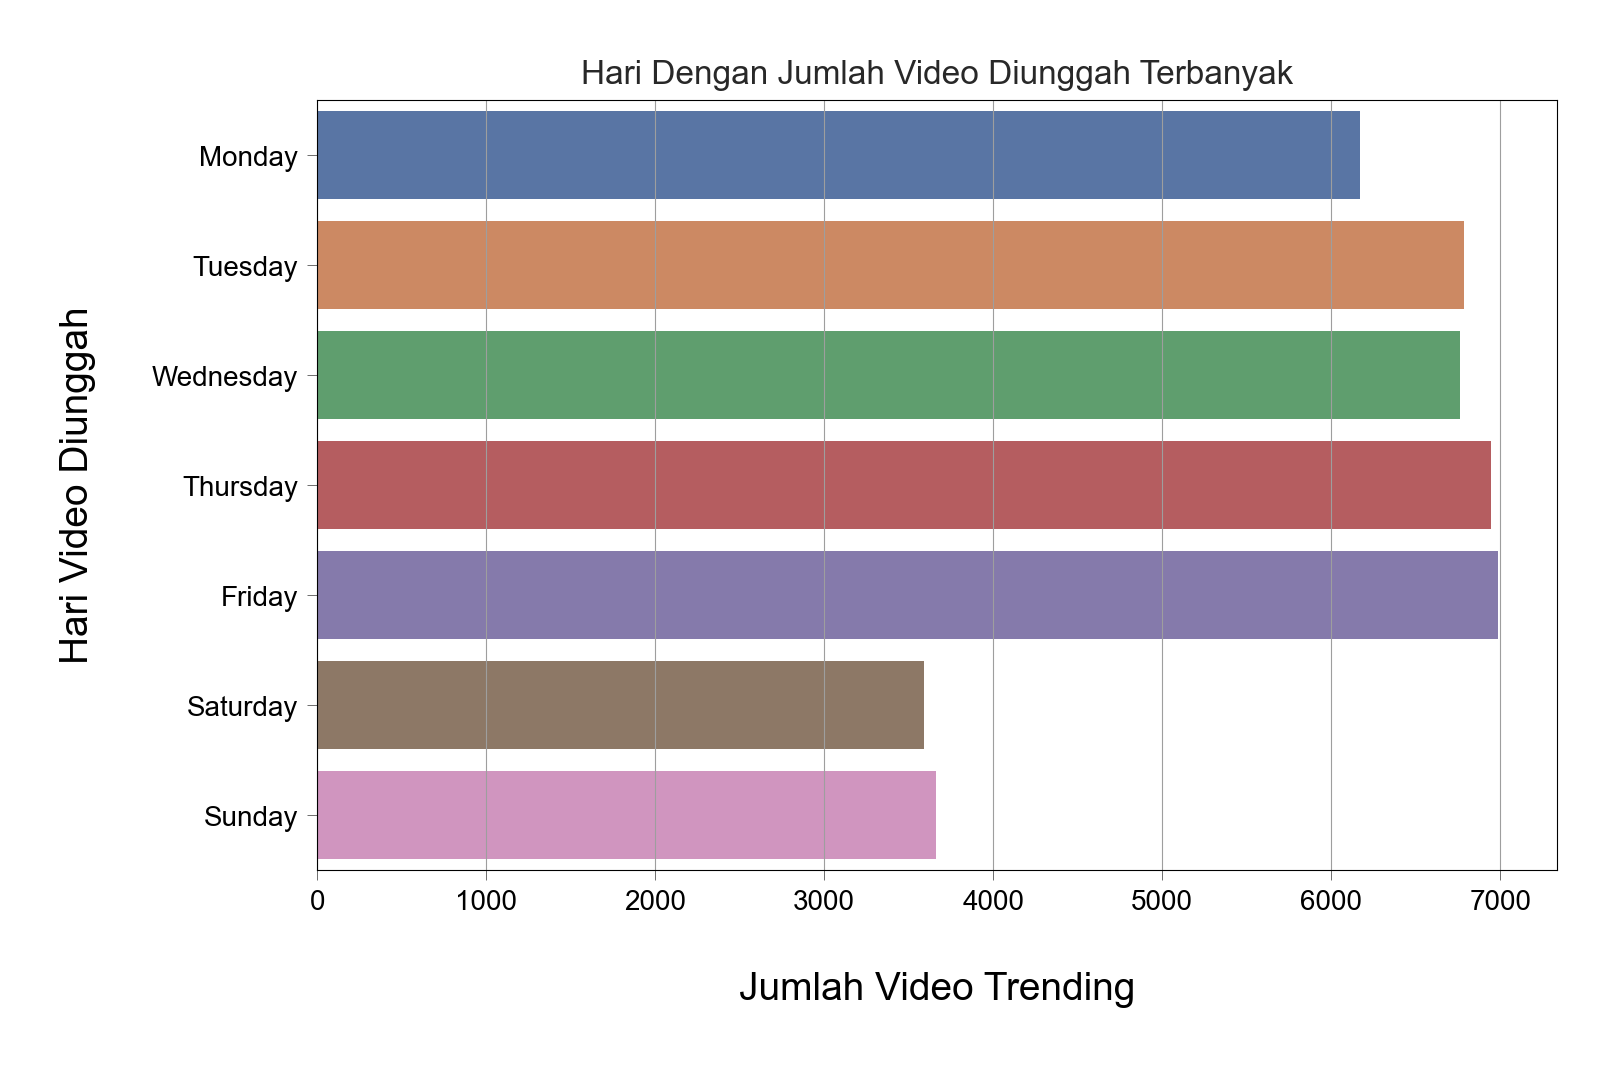

In [49]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
yt['publish_day'] = pd.Categorical(yt['publish_day'], categories=day_order, ordered=True)
hari = yt.sort_values('publish_day')
hari = yt['publish_day'].value_counts()\
        .to_frame().reset_index().rename(columns={'index' : 'publish_day', 'publish_day' : 'jumlah_video'})
fig, ax = plt.subplots()
bar3 = sns.barplot(y='publish_day', x='jumlah_video', data=hari, 
                palette=sns.color_palette('deep', n_colors=7), ax=ax)
bar3 = ax.set(ylabel='Hari Video Diunggah', xlabel='Jumlah Video Trending', title='Hari Dengan Jumlah Video Diunggah Terbanyak')

Dapat dilihat hari dengan jumlah video trending terbanyak terbilang tidak ada yang signifikan, hampir semua hari memiliki perbedaan yang sedikit, terkecuali hari sabtu & minggu yang tidak kita duga merupakan 2 hari yang mempunyai video trending paling sedikit. Oleh karena itu disarankan untuk menggugah video pada hari kerja atau weekdays terutama hari kamis yang mempunya jumlah video trending sedikit lebih banyak dibanding yang lain. Dan tidak disarankan untuk menggugahnya pada hari libur atau weekend.

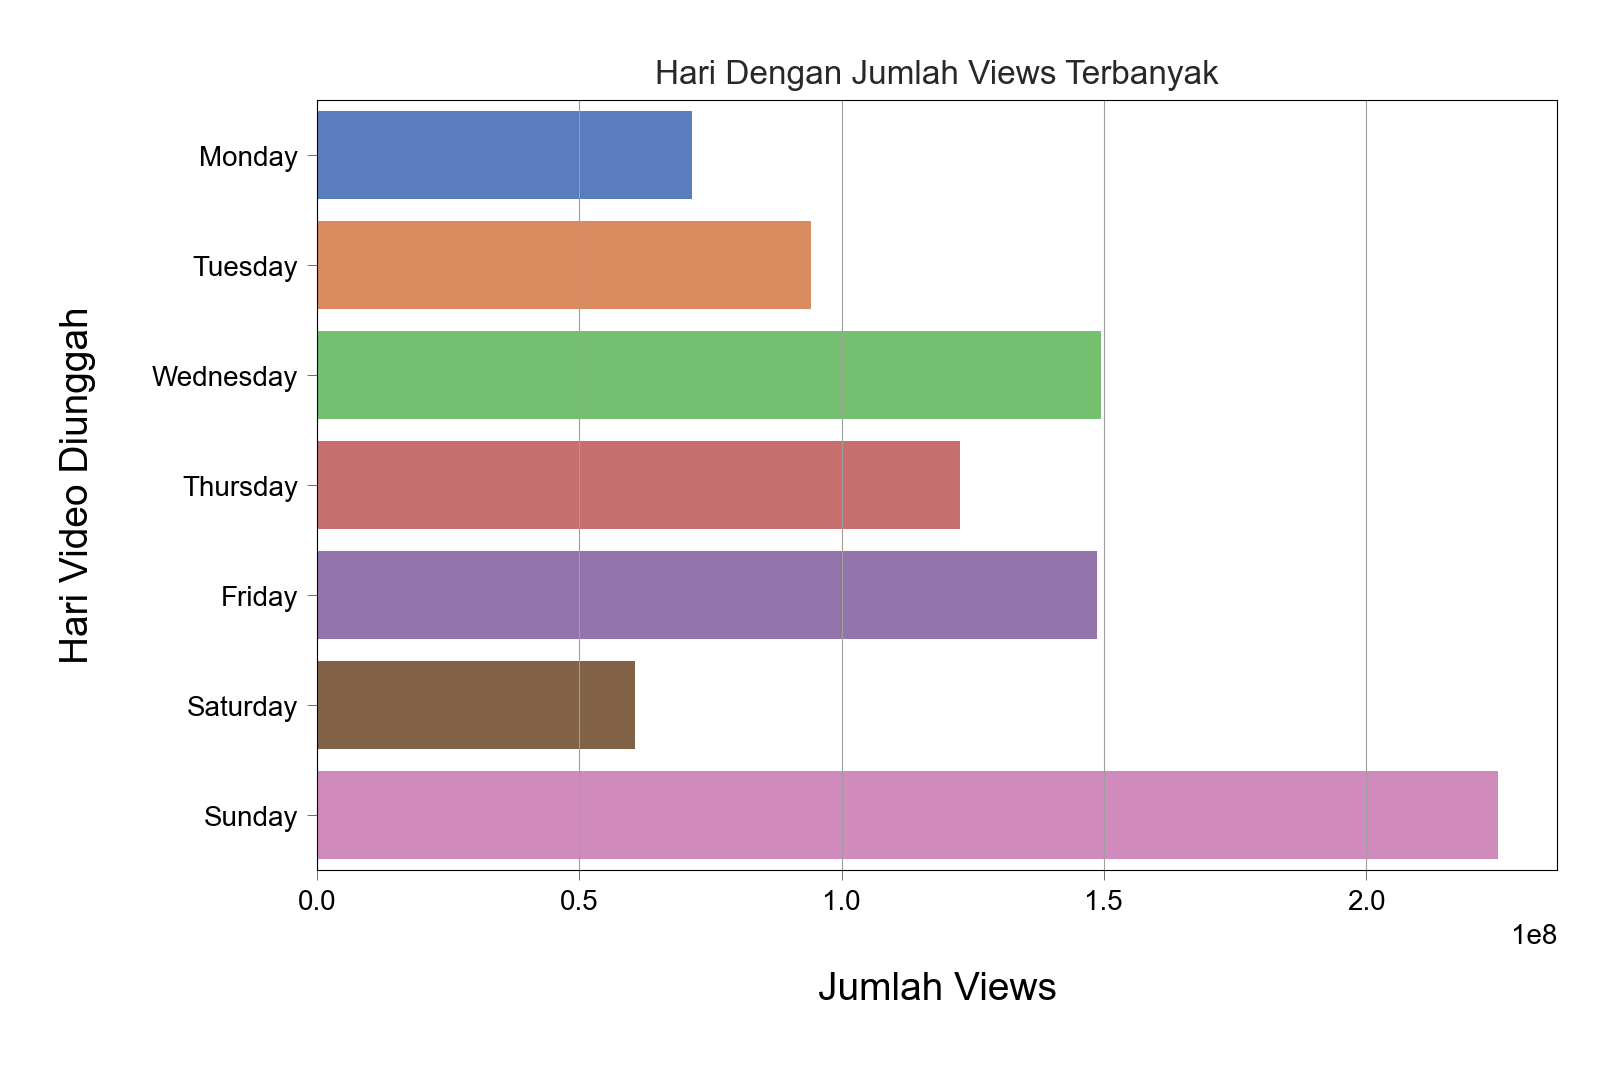

In [50]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
yt['publish_day'] = pd.Categorical(yt['publish_day'], categories=day_order, ordered=True)
hari = yt.sort_values('publish_day')
hari = yt.groupby('publish_day').agg({'views': 'max'}) \
        .reset_index().rename(columns={'publish_day' : 'publish_day', 'views' : 'total_views'})

fig, ax = plt.subplots()
bar3 = sns.barplot(y='publish_day', x='total_views', data=hari, 
                palette=sns.color_palette('muted', n_colors=7), ax=ax)
bar3 = ax.set(ylabel='Hari Video Diunggah', xlabel='Jumlah Views', title='Hari Dengan Jumlah Views Terbanyak')


Dari plot di atas terlihat perbedaan dengan plot yang sebelumnya, yang mana hari weekday mempunyai jumlah video trending paling banyak. Di plot ini hari minggu mempunyai jumlah views paling banyak, jadi dapat dipertimbangkan untuk menggugah video di hari minggu dikarenakan jumlah views yang lumayan lebih signifikan dibanding hari lain. Sedangkan hari sabtu merupakan hari yang jumlahnya paling kecil, oleh karena itu sangat disarankan untuk tidak menggugah video hari sabtu.

## Kolom `publish_time`

Pada kolom `publish_time` kita akan mencoba menganalisis beberapa pertanyaan yang dapat diambil dari kolom `publish_time`, berikut pertanyaannya :
* jam dengan jumlah video trending terbanyak 
* jam dengan jumlah views terbanyak


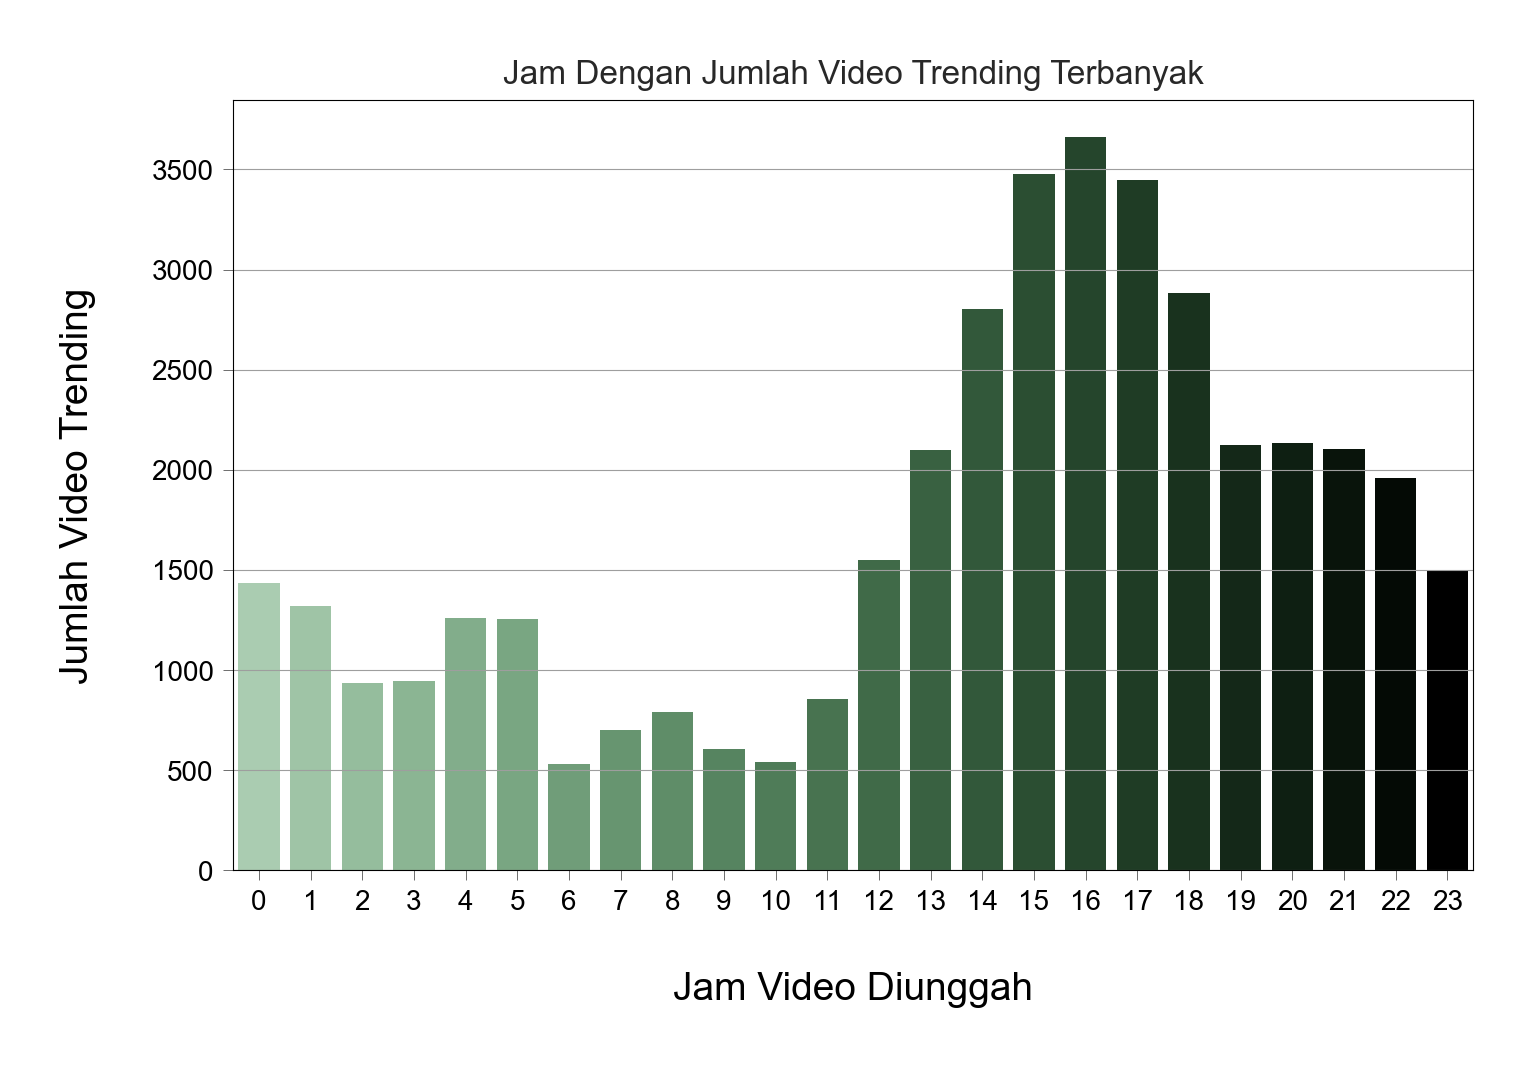

In [51]:
# jam dengan jumlah video trending terbanyak

yt['jam'] = yt['publish_time'].dt.hour
jam = yt.groupby(['jam'])['publish_time'].count().reset_index()
jam = jam.rename(columns={'publish_time': 'jumlah_video'})
jam.sort_values(by=['jam'],inplace=True)

fig, ax = plt.subplots()
bar4 = sns.barplot(x='jam', y='jumlah_video', data=jam, 
                palette=sns.cubehelix_palette(24, start=2, rot=0, dark=0, light=.75, reverse=False), ax=ax)
bar4 = ax.set(xlabel='Jam Video Diunggah', ylabel='Jumlah Video Trending', title='Jam Dengan Jumlah Video Trending Terbanyak')

Jam dengan jumlah video trending terbanyak terdapat pada rentang jam 14.00 - 18.00, maka dari itu disarankan untuk menggugah video pada jam - jam tersebut terutama pada jam 16.00.

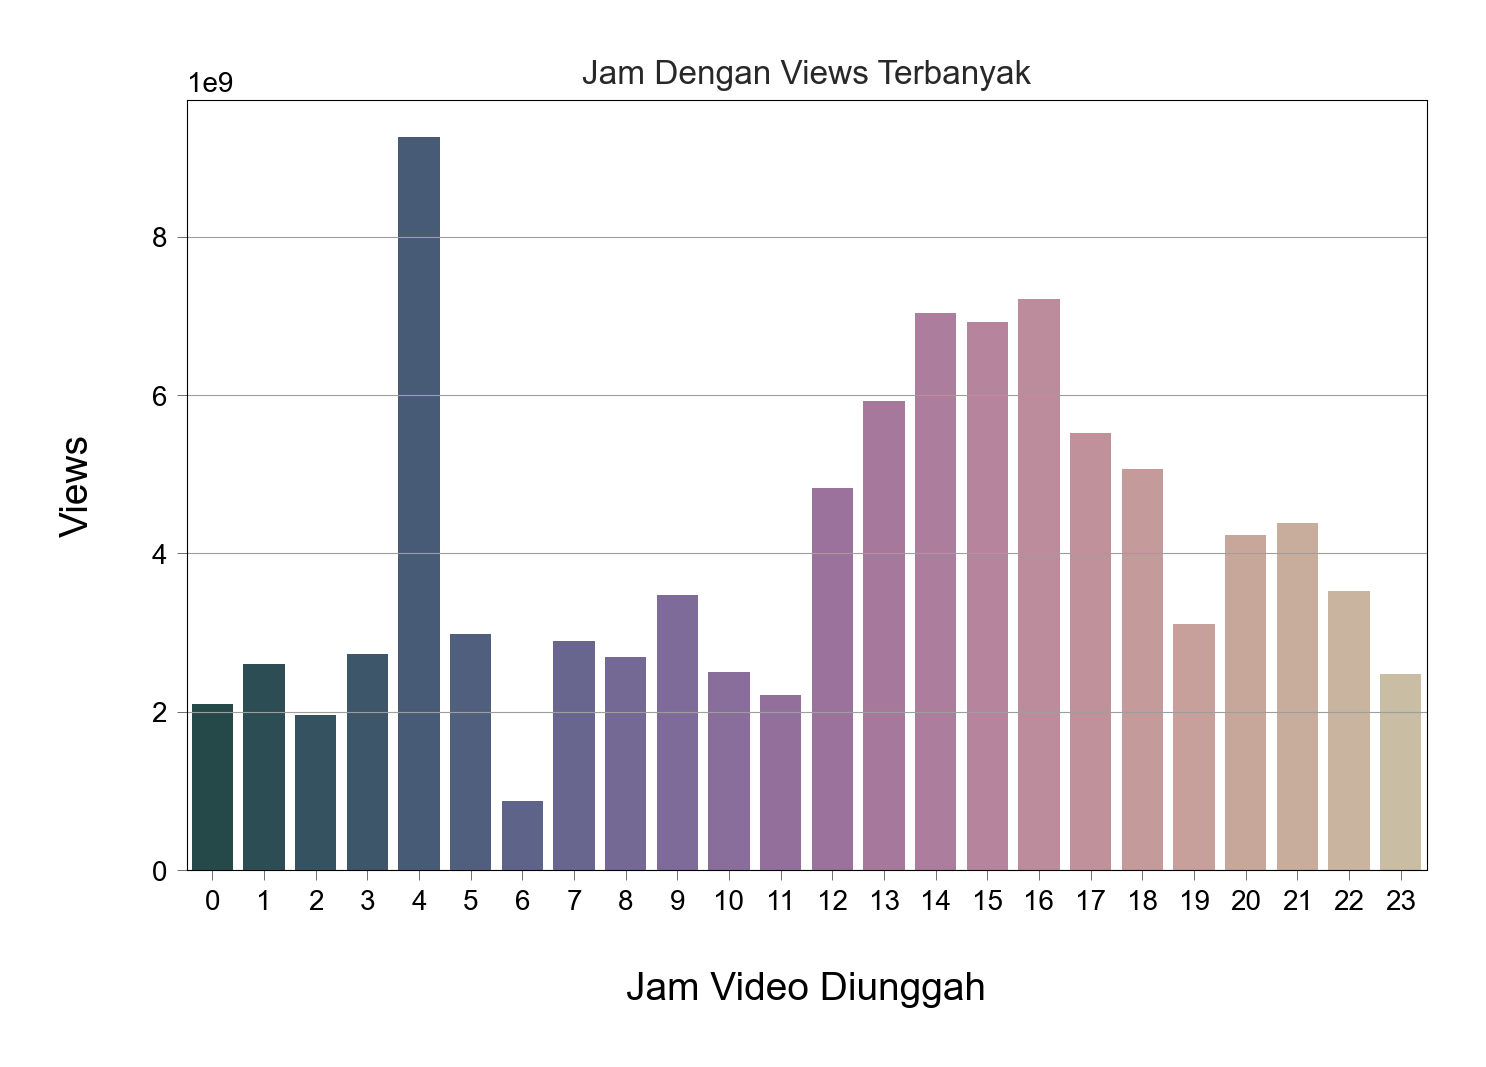

In [52]:
# jam dengan jumlah views terbanyak

yt['jam'] = yt['publish_time'].dt.hour
jam = yt.groupby(['jam'])['views'].sum().reset_index()
jam = jam.rename(columns={'views': 'jumlah_views'})
jam.sort_values(by=['jam'],inplace=True)

fig, ax = plt.subplots()
bar4 = sns.barplot(x='jam', y='jumlah_views', data=jam, 
                palette=sns.cubehelix_palette(24, start=1.5, rot=1.25, dark=0.25, light=.75, reverse=True), ax=ax)
bar4 = ax.set(xlabel='Jam Video Diunggah', ylabel='Views', title='Jam Dengan Views Terbanyak')

Jam dengan views terbanyak ada pada jam 04.00 pagi, tetapi pada jam 14.00 - 18.00 views juga masih terbilang banyak. Jadi jam 14.00 - 18-00 masih merupakan jam terbaik untuk menggugah video, karena pada plot sebelumnya jam 04.00 tidak dapat dibilang jam dengan jumlah video trending yang banyak.

## Kolom `comments_disabled`

Dari kolom `comments_disabled` kita akan menganalisis 1 pertanyaan, yaitu perbandingan jumlah video trending antara video yang kolom komentarnya dinon-aktifkan dan yang tidak dinon-aktifkan.

In [53]:
table = pd.crosstab(index=yt['comments_disabled'], columns='Total')
table['Persentase'] = table/table.sum()*100
table

col_0              Total  Persentase
comments_disabled                   
False              40269  98.454806 
True               632    1.545194

Text(0, 0.5, 'Jumlah Video')

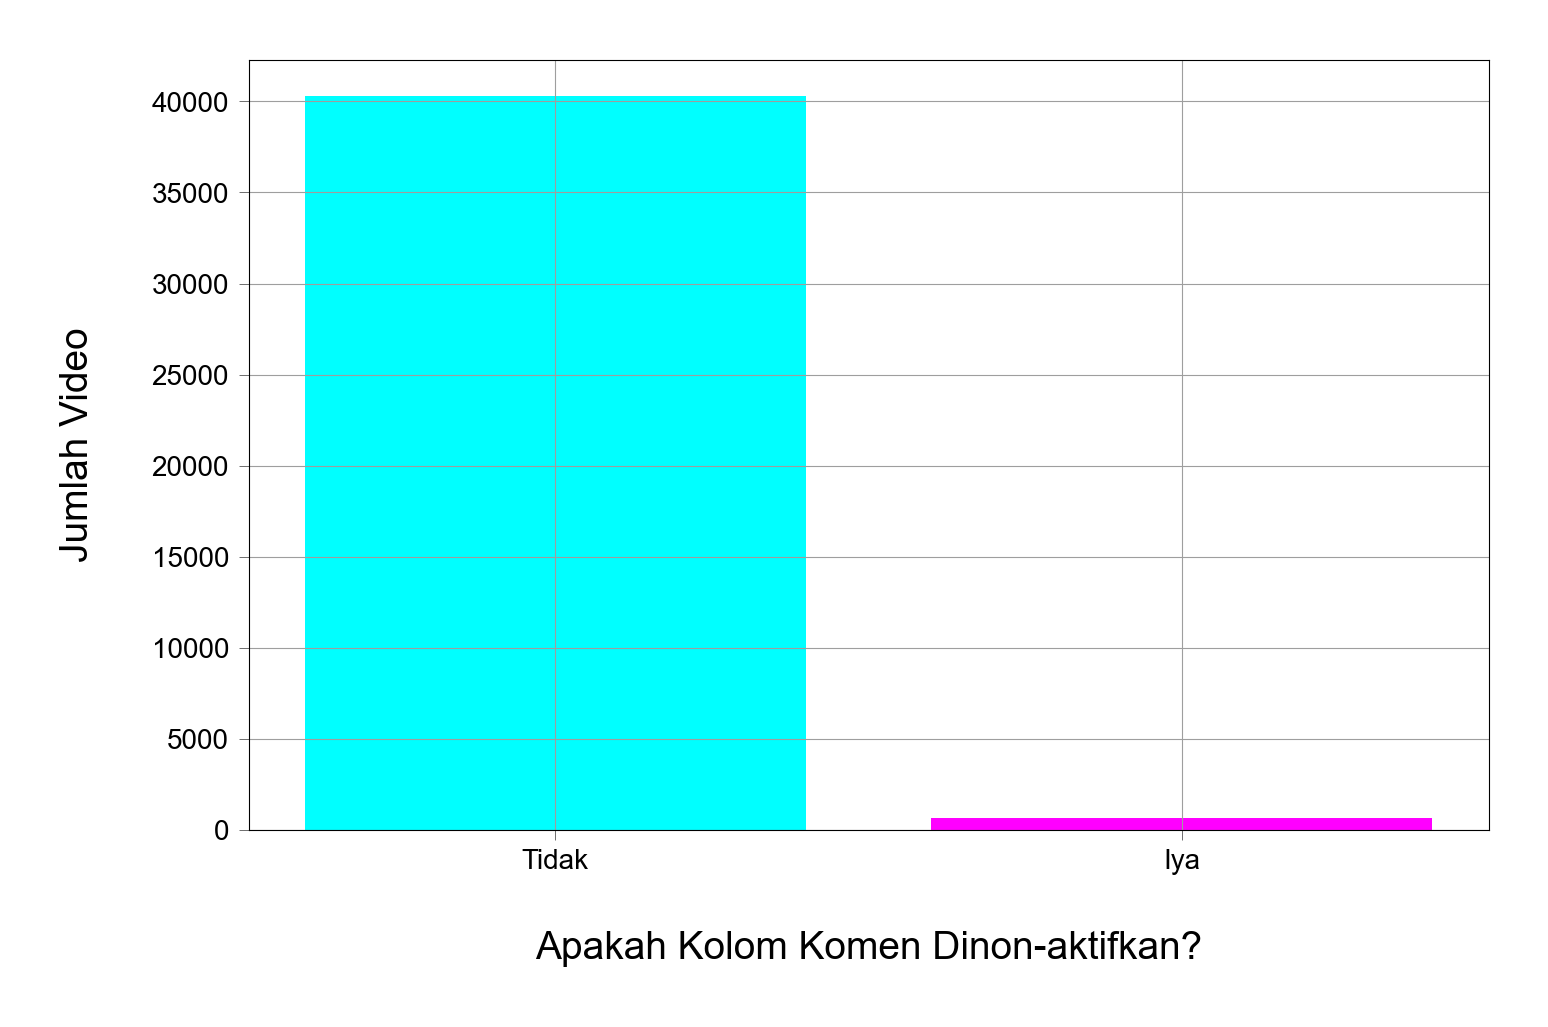

In [54]:
comments = yt['comments_disabled'].value_counts().to_dict()
fig, ax = plt.subplots()
bar = ax.bar(['Tidak', 'Iya'], [comments[False], comments[True]], color=['#00ffff','#ff00ff'])
ax.set_xlabel('Apakah Kolom Komen Dinon-aktifkan?')
ax.set_ylabel('Jumlah Video')


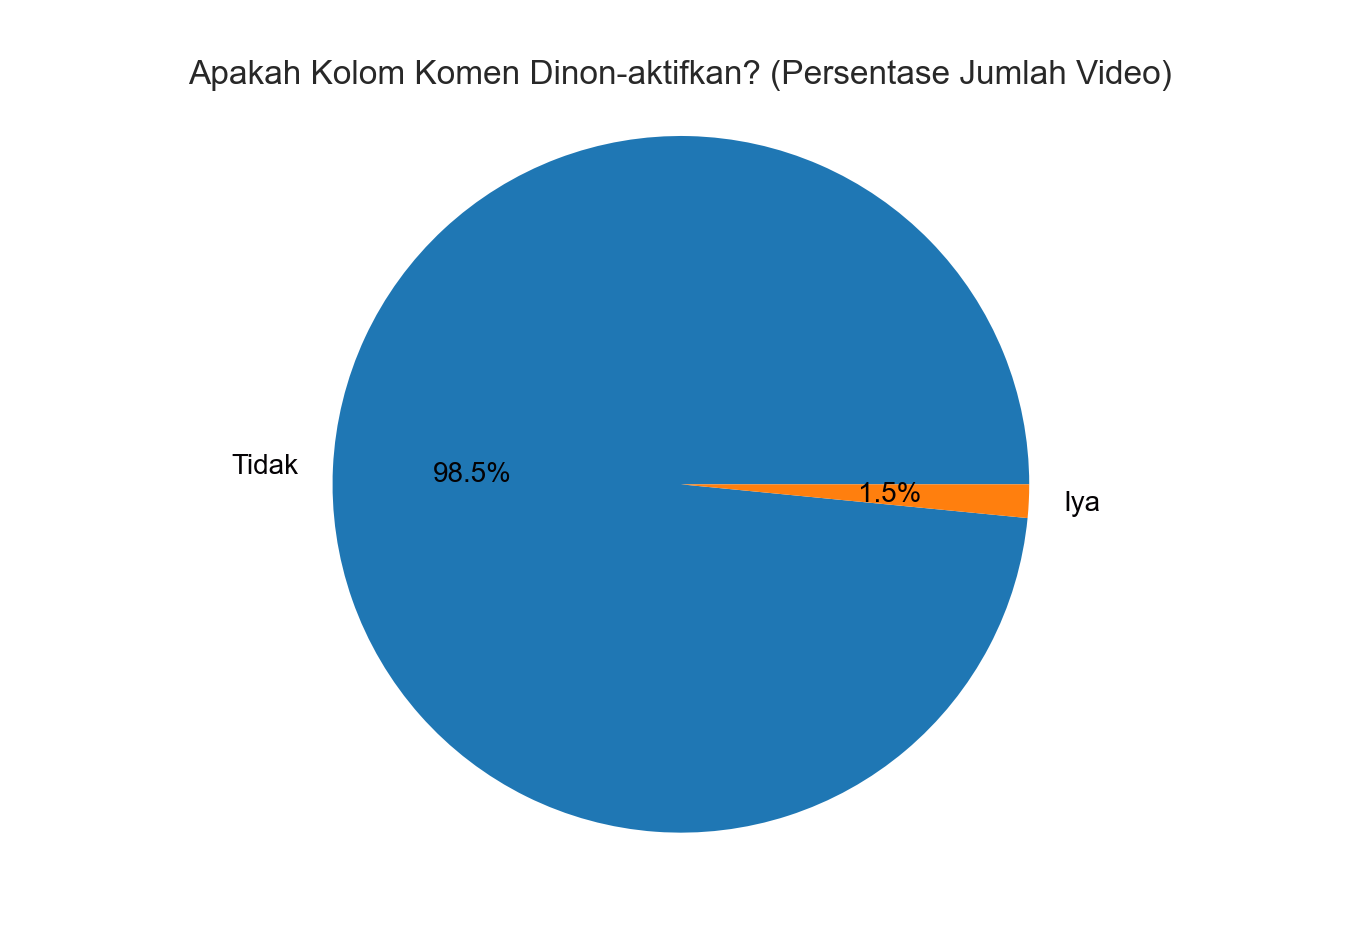

In [55]:
comments = yt['comments_disabled'].value_counts().to_dict()
fig, ax = plt.subplots()
pie4 = ax.pie([comments[False], comments[True]], labels=['Tidak', 'Iya'], 
             textprops={'color': '#040204'}, autopct='%1.1f%%')
pie4 = ax.axis('equal')
pie4 = ax.set_title('Apakah Kolom Komen Dinon-aktifkan? (Persentase Jumlah Video)')

Dari 2 grafik di atas, terlihat bahwa video trending lebih banyak yang tidak menon-aktifkan kolom komentarnya, jadi disarankan untuk tidak mematikan kolom komentar video yang akan diupload nanti.

## Kolom `ratings_disabled`

Dari kolom `ratings_disabled` kita akan menganalisis 1 pertanyaan, yaitu perbandingan jumlah video trending antara video yang ratingnya dinon-aktifkan dan yang tidak dinon-aktifkan.

In [56]:
table = pd.crosstab(index=yt['ratings_disabled'], columns='Total')
table['Persentase'] = table/table.sum()*100
table

col_0             Total  Persentase
ratings_disabled                   
False             40732  99.586807 
True              169    0.413193

Text(0, 0.5, 'Jumlah Video')

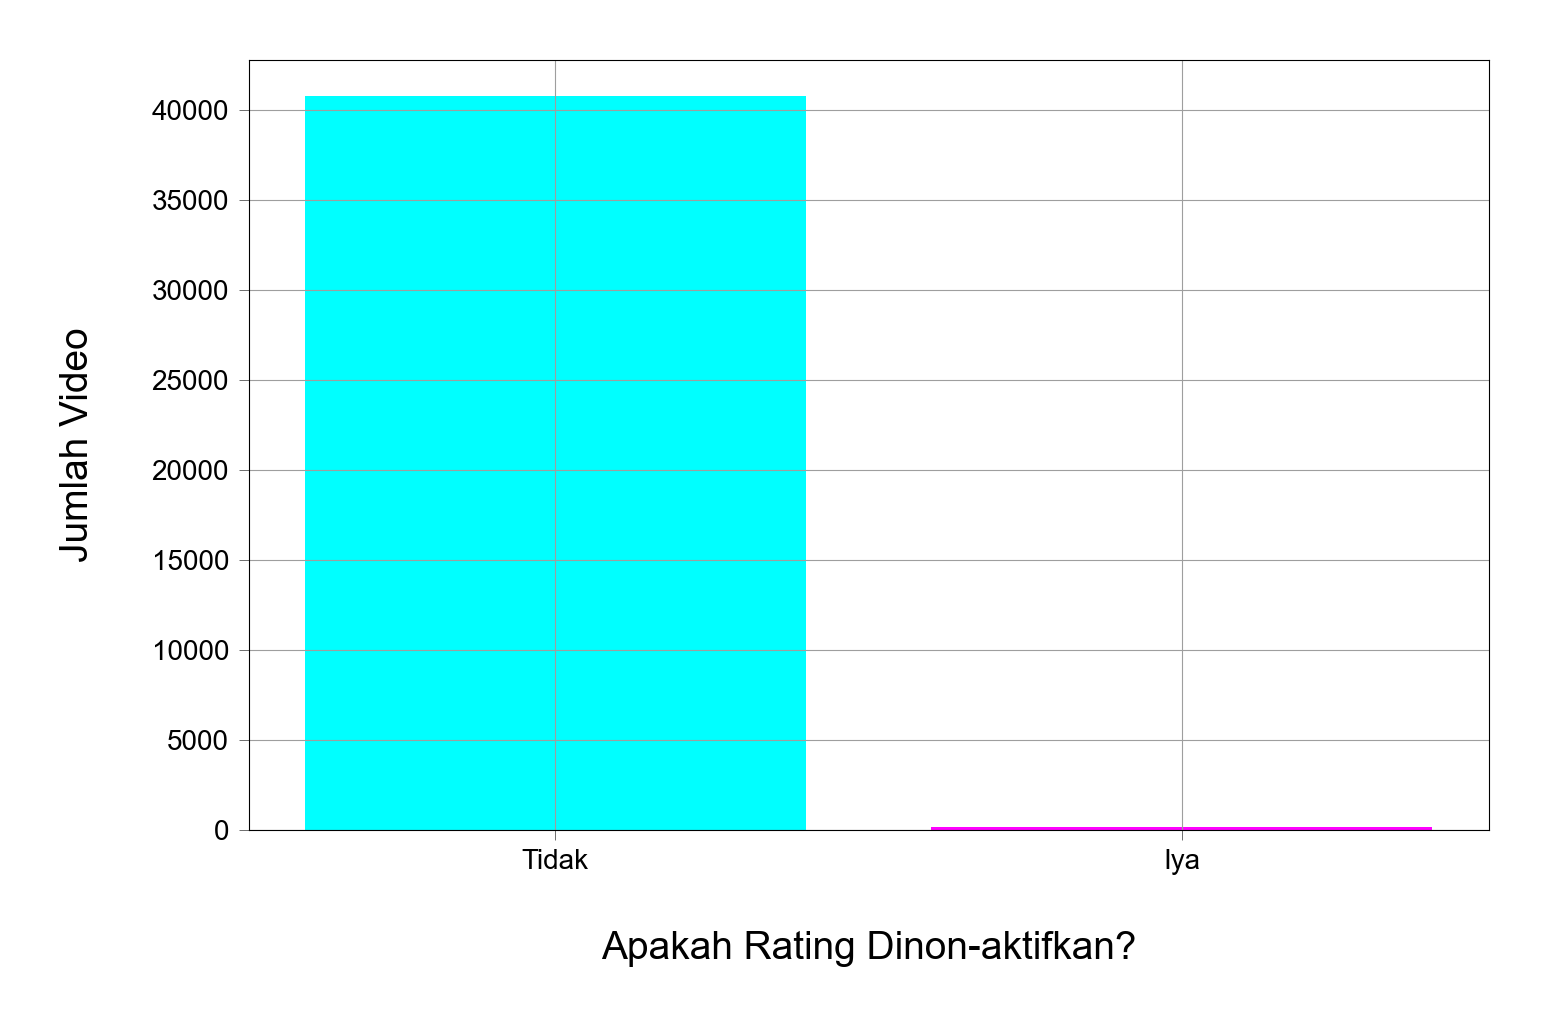

In [57]:
ratings = yt['ratings_disabled'].value_counts().to_dict()
fig, ax = plt.subplots()
bar = ax.bar(['Tidak', 'Iya'], [ratings[False], ratings[True]], color=['#00ffff','#ff00ff'])
ax.set_xlabel('Apakah Rating Dinon-aktifkan?')
ax.set_ylabel('Jumlah Video')


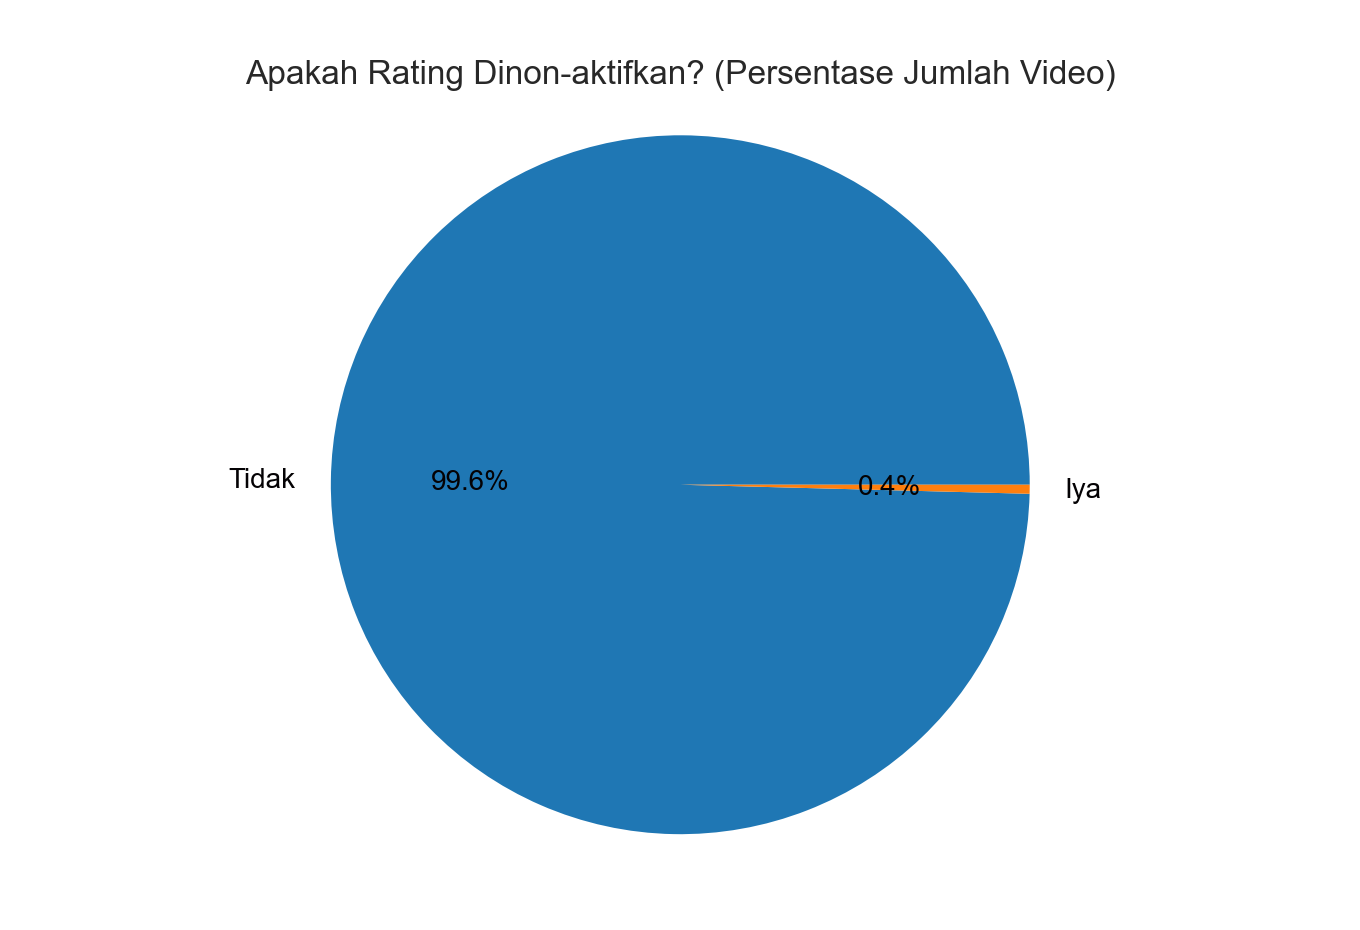

In [58]:
ratings = yt['ratings_disabled'].value_counts().to_dict()
fig, ax = plt.subplots()
pie4 = ax.pie([ratings[False], ratings[True]], labels=['Tidak', 'Iya'], 
             textprops={'color': '#040204'}, autopct='%1.1f%%')
pie4 = ax.axis('equal')
pie4 = ax.set_title('Apakah Rating Dinon-aktifkan? (Persentase Jumlah Video)')

Dari 2 grafik di atas, terlihat bahwa video trending lebih banyak yang tidak menon-aktifkan ratingnya, jadi disarankan untuk tidak mematikan rating yang memperlihatkan like/dislike suatu video di video yang akan diupload nanti.

In [59]:
yt.to_excel('Capstone2.xlsx', index=False)

In [60]:
display(yt.describe().round(1), yt.describe(include='object'))

views      likes  comment_count  panjang      jam
count  40901.0      40901.0    40901.0        40901.0  40901.0
mean   2360678.0    74271.7    8448.6         48.6     13.8   
std    7397718.7    228999.9   37451.4        19.6     6.4    
min    549.0        0.0        0.0            3.0      0.0    
25%    241972.0     5416.0     613.0          34.0     10.0   
50%    681064.0     18069.0    1855.0         46.0     15.0   
75%    1821926.0    55338.0    5752.0         61.0     18.0   
max    225211923.0  5613827.0  1361580.0      100.0    23.0

title channel_title  \
count   40901                                       40901          
unique  6455                                        2207           
top     WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  ESPN           
freq    29                                          202            

             category publish_month    tags judul_kapital  
count   40901          40901         40901   40901         
unique  16             12            6055    3             
top     Entertainment  May           [none]  Campuran      
freq    9944           6633          1534    32424

# Kesimpulan & Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tentang video trending di youtube

* data diambil dari halaman video trending di youtube selama 205 hari, dari tahun 2017 - 2018. Jumlah data ada 40.901.
* kolom views, like, & comment_counts memiliki outlier. Oleh karena itu perbedaan min & max tiap kolom berbeda jauh.
* satu video bisa muncul beberapa kali di data dikarenakan trending selama beberapa hari.
* terdapat korelasi positif yang kuat di antara kolom views, likes, dan comment_count. 
* terdapat korelasi positif yang kuat di antara kolom title, channel_title, dan category.
* karakter di judul video youtube kebanyakan memakai kombinasi antara huruf besar dan huruf kecil.
* jumlah karakter kebanyakan tidak terlalu panjang juga tidak terlalu pendek.
* channel dengan jumlah video trending terbanyak didominasi oleh talkshow.
* kategori entertainment dan music mendominasi di semua plot yang saya buat.
* banyak video yang diunggah di hari kerja masuk trending.
* banyak video yang diunggah pada jam siang ke sore masuk trending.
* hampir semua video yang trending tidak menon-aktifkan kolom komentar dan rating pada videonya.


**Rekomendasi**

1. Membuat judul video dengan jumlah karakter yang sedang, dan menggunakan kombinasi huruf kapital maupun kecil.
2. Bekerja sama dengan channel-channel talkshow di youtube, atau channel-channel musisi di youtube jika dirasa mau.
3. Membuat video dengan kategori entertainment dan music, dengan tambahan kategori people & blogs dan film & animation.
4. Pada saat ingin menggugah video disarankan pada hari kerja dan pada jam 14.00 - 18.00.
5. Kolom komentar dan juga rating pada video sebisa mungkin jangan dinon-aktifkan, biarkan orang-orang tetap bisa berkomentar dan juga melihat jumlah likes serta dislikes.